# 📈 **Решение задачи Линейной регрессии (Linear Regression)**

# 📤 Импорт и установка библиотек

In [ ]:
# Load data libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

# Modeling
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix

## 🔗 Проверка подключения к Google Диску

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 📂 Чтение файлов из Google Диска

In [ ]:
import os
print(os.listdir('./gdrive/MyDrive/SHIFT_SUMMER/'))

['train.csv', 'starting_k', 'submission.csv']


##💿 Чтение датасета

In [ ]:
df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/train.csv', index_col=0)
df

full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0           43   24.0      2014.0       1.0      10.0    1.0             1   
1           66    3.0      1979.0       3.0      10.0    3.0             0   
2           55    5.0      1979.0       2.0       6.0    2.0             0   
3           45    7.0      1970.0       2.0       6.0    2.0             0   
4           43    4.0      1968.0       2.0       6.0    2.0             0   
...        ...    ...         ...       ...       ...    ...           ...   
21324       56   19.0      1979.0       2.0       1.0    1.0             1   
21325       42    5.0      1977.0       1.0       8.0    3.0             0   
21326       32    3.0      1979.0       2.0       6.0    2.0             0   
21327       43    4.0      1969.0       2.0       5.0    2.0             0   
21328       32    1.0      1979.0       2.0       6.0    2.0             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
0         8.294300     0.007122                    0  ...   
1        11.314231     0.232205                    4  ...   
2        11.718817     0.000170                    5  ...   
3        11.331032     0.428826                    4  ...   
4        11.538769     0.136330                    6  ...   
...            ...          ...                  ...  ...   
21324    11.655744     0.049637                    6  ...   
21325    11.718817     0.000170                    5  ...   
21326    11.719940     0.000000                    4  ...   
21327    11.331032     0.428826                    4  ...   
21328    11.793198     0.130618                   12  ...   

       cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  \
0                               0                     6.907755   
1                               0                     6.626122   
2                               0                     6.368753   
3                               0                     6.753601   
4                               0                     6.636603   
...                           ...                          ...   
21324                           0                     6.492240   
21325                           0                     6.502295   
21326                           0                     6.572814   
21327                           0                     6.586172   
21328                           0                     6.536692   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
0             3.710396                     6.725430                  0   
1             2.764431                     6.479615                  1   
2             3.511844                     6.192138                  0   
3             1.814825                     6.551080                  0   
4             2.257588                     6.646507                  1   
...                ...                          ...                ...   
21324         2.711378                     6.816188                  0   
21325         3.802208                     6.291569                  0   
21326         3.062456                     6.583520                  1   
21327         2.408745                     6.563982                  0   
21328         1.726332                     6.543538                  0   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
0            1.803359                     6.616560                  0  2014   
1            2.631169                     6.469948                  1  2013   
2            1.363537                     6.462171                  0  2012   
3            2.732418                     6.458229                  0  2014   
4            2.020222                     6.634778                  2  2014   
...               ...                          ...                ...   ...   
21324        3.297317                     6.536155                  0  2014   
21325        1.442202  

In [ ]:
df.shape

(21329, 51)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_count_brick    

##🗂️ Разделение выборки для тренировки и теста

In [ ]:
# Split the data into train and test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 17063
Test set size: 4266


In [ ]:
train_data.describe()

full_sq         floor    build_year      num_room      kitch_sq  \
count  17063.000000  17063.000000  17063.000000  17063.000000  17063.000000   
mean      53.927328      7.638077   1924.914318      1.943328      6.372971   
std       21.936471      5.280166    333.369444      0.701414     26.592567   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       38.000000      3.000000   1976.000000      2.000000      5.000000   
50%       50.000000      6.500000   1979.000000      2.000000      6.000000   
75%       63.000000     11.000000   1984.000000      2.000000      8.000000   
max      729.000000     44.000000   2017.000000     17.000000   2013.000000   

              state  product_type   raion_popul   indust_part  \
count  17063.000000  17063.000000  17063.000000  17063.000000   
mean       2.059720      0.358847     10.902387      0.118952   
std        0.636858      0.479676      1.152922      0.119282   
min        1.000000      0.000000      7.842279      0.000000   
25%        2.000000      0.000000      9.990536      0.018578   
50%        2.000000      0.000000     11.332626      0.072158   
75%        2.000000      1.000000     11.718817      0.195781   
max        4.000000      1.000000     12.419041      0.521867   

       sport_objects_raion  ...  cafe_count_1000_price_high  \
count         17063.000000  ...                17063.000000   
mean              6.595265  ...                    0.056965   
std               6.522276  ...                    0.316638   
min               0.000000  ...                    0.000000   
25%               1.000000  ...                    0.000000   
50%               5.000000  ...                    0.000000   
75%              10.000000  ...                    0.000000   
max              29.000000  ...                    6.000000   

       cafe_sum_1500_min_price_avg  green_part_2000  \
count                 17063.000000     17063.000000   
mean                      6.534450         2.755784   
std                       0.252520         0.863634   
min                       5.703782        -4.605170   
25%                       6.396930         2.321407   
50%                       6.540034         2.870169   
75%                       6.668863         3.342508   
max                       7.824046         4.321480   

       cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
count                 17063.000000       17063.000000    17063.000000   
mean                      6.545153           0.197035        2.173507   
std                       0.245402           0.445452        0.618731   
min                       5.703782           0.000000       -1.078810   
25%                       6.422240           0.000000        1.803359   
50%                       6.526978           0.000000        2.196113   
75%                       6.659294           0.000000        2.641910   
max                       7.680947           2.000000        3.351307   

       cafe_sum_5000_min_price_avg  mosque_count_5000          year  \
count                 17063.000000       17063.000000  17063.000000   
mean                      6.622877           0.441657   2013.450566   
std                       0.177530           0.607637      0.964073   
min                       5.703782           0.000000   2011.000000   
25%                       6.509216           0.000000   2013.000000   
50%                       6.581665           0.000000   2014.000000   
75%                       6.703654           1.000000   2014.000000   
max                       7.536364           2.000000   2015.000000   

          price_doc  
count  1.706300e+04  
mean   7.145325e+06  
std    4.740813e+06  
min    1.000000e+05  
25%    4.756130e+06  
50%    6.296600e+06  
75%    8.300000e+06  
max    7.880225e+07  

[8 rows x 51 columns]

##📊 Визуализация данных

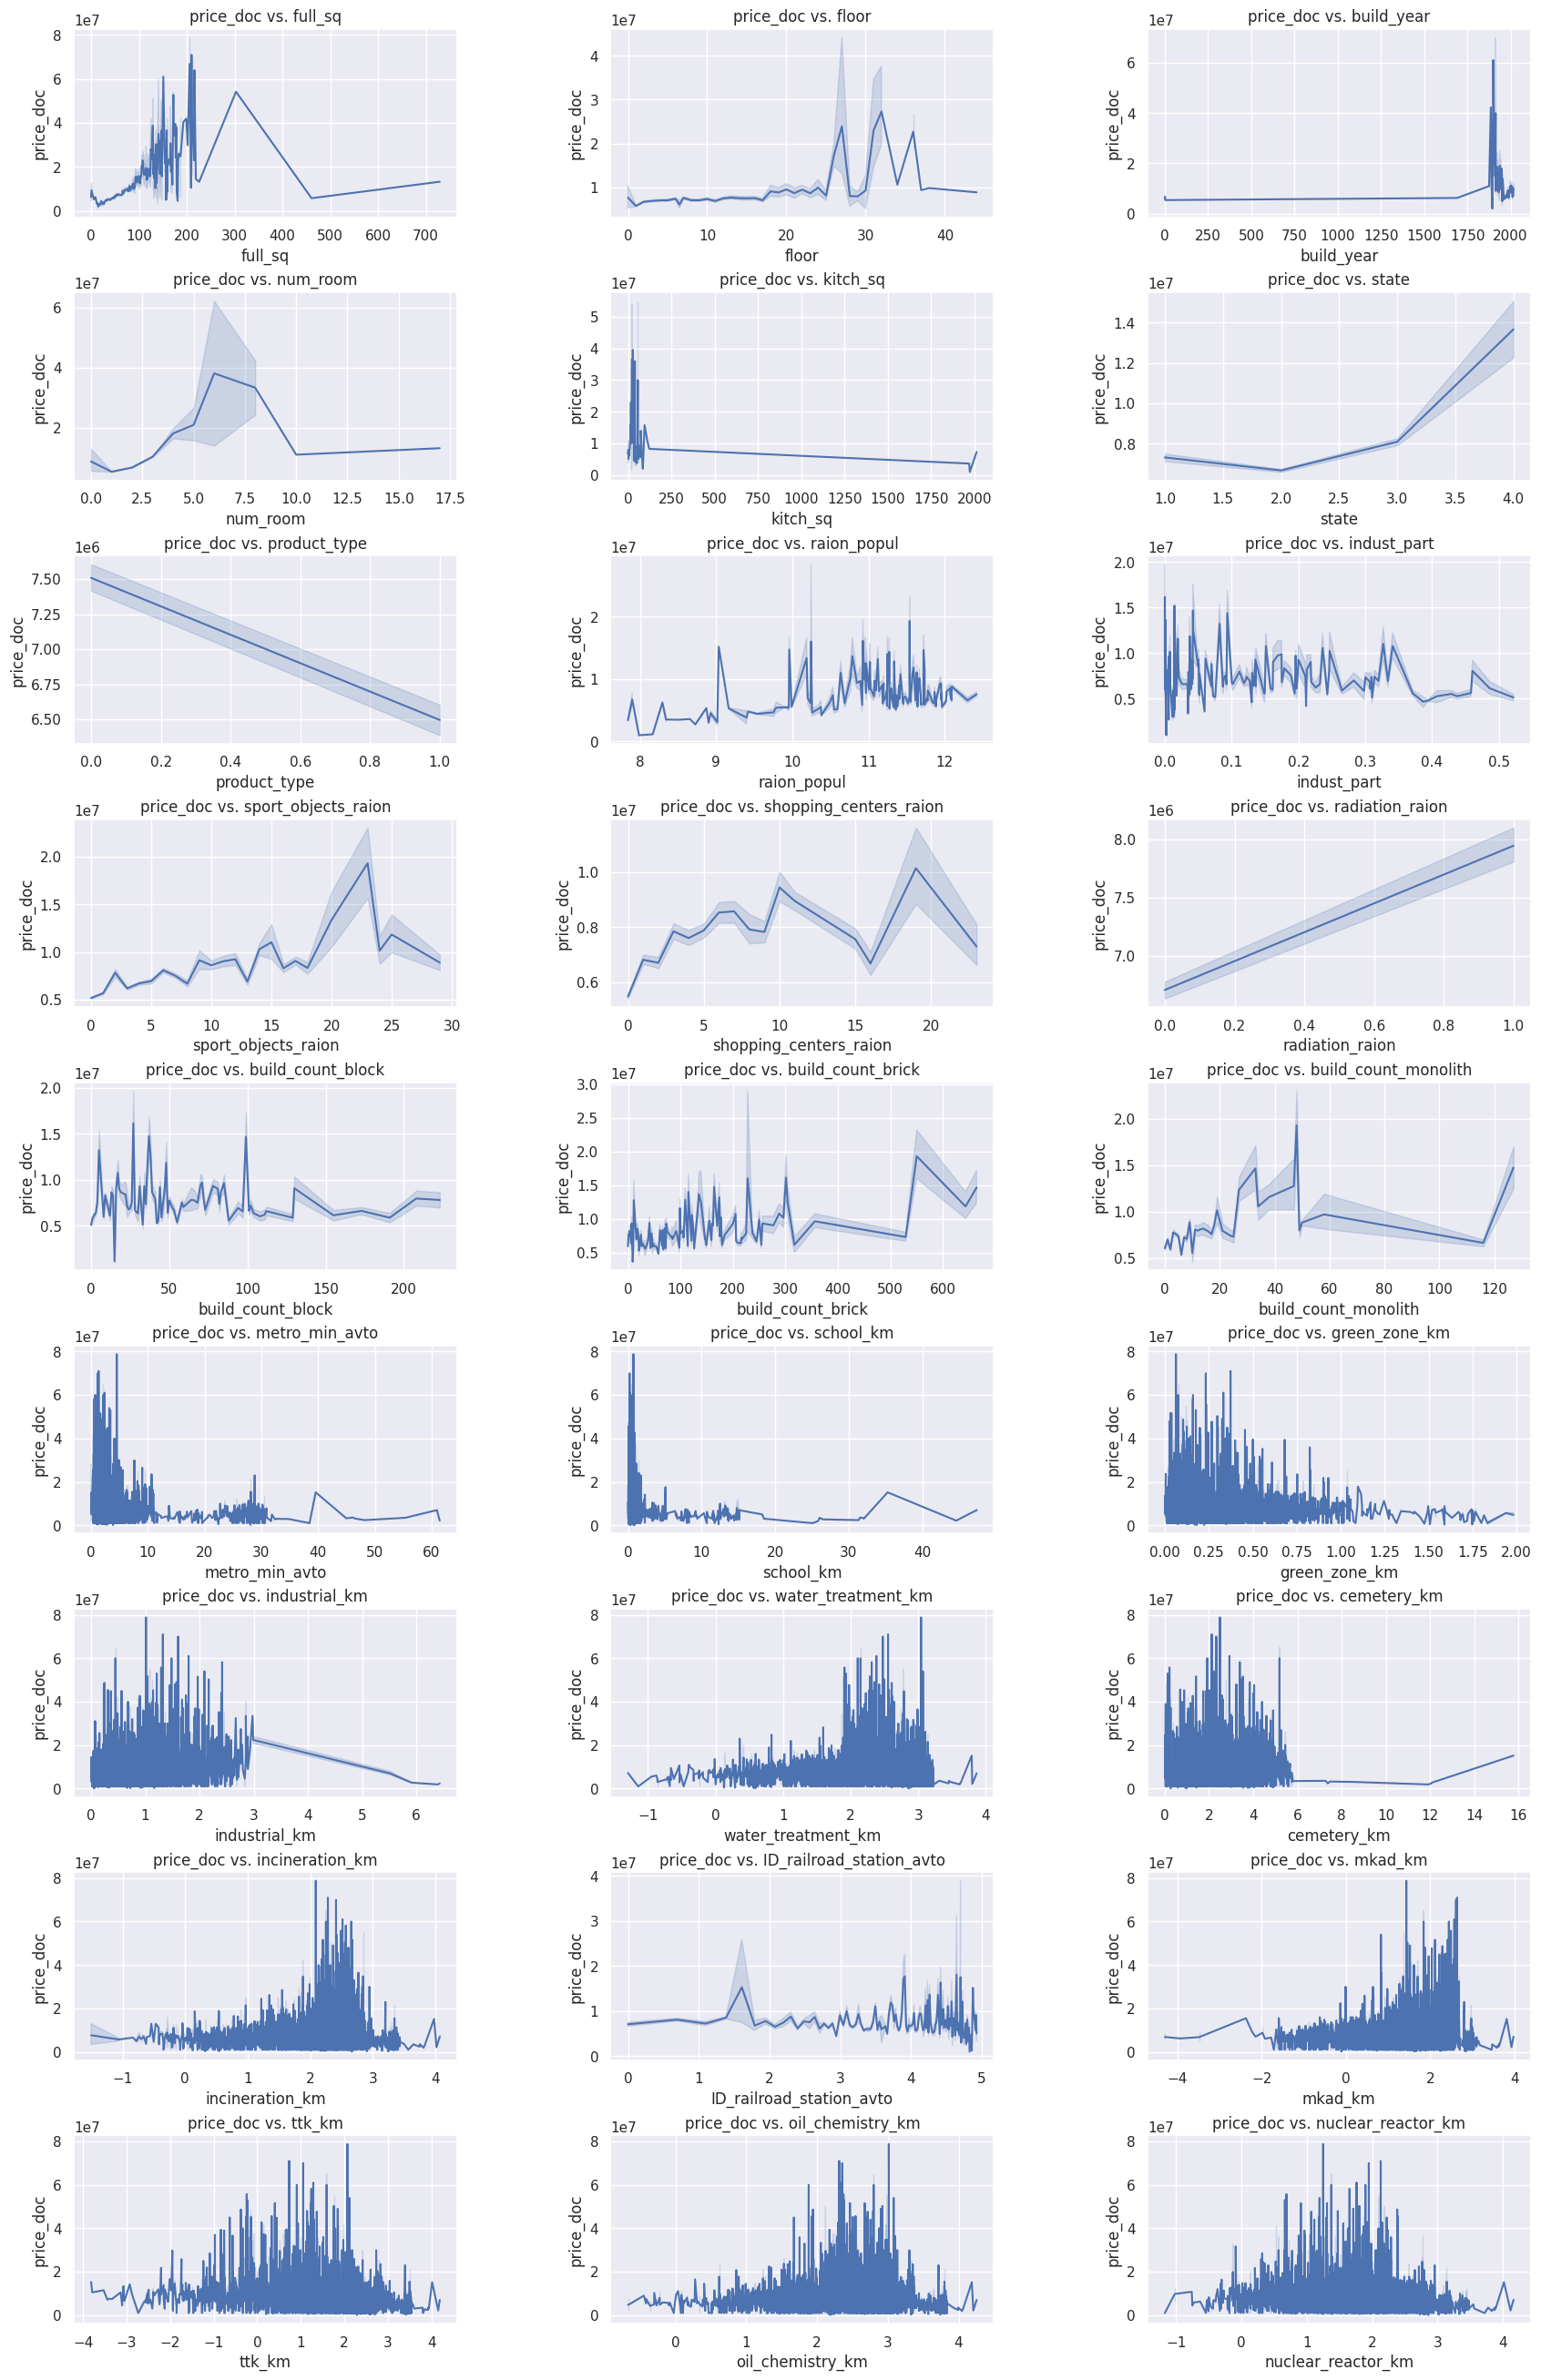

In [ ]:
# First let's visualize the features against the price

fig, ax = plt.subplots(9, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="full_sq", y="price_doc", ax=ax[0])
ax[0].set_title("price_doc vs. full_sq")

sns.lineplot(data=train_data, x="floor", y="price_doc", ax=ax[1])
ax[1].set_title("price_doc vs. floor")

sns.lineplot(data=train_data, x="build_year", y="price_doc", ax=ax[2])
ax[2].set_title("price_doc vs. build_year")

sns.lineplot(data=train_data, x="num_room", y="price_doc", ax=ax[3])
ax[3].set_title("price_doc vs. num_room")

sns.lineplot(data=train_data, x="kitch_sq", y="price_doc", ax=ax[4])
ax[4].set_title("price_doc vs. kitch_sq")

sns.lineplot(data=train_data, x="state", y="price_doc", ax=ax[5])
ax[5].set_title("price_doc vs. state")

sns.lineplot(data=train_data, x="product_type", y="price_doc", ax=ax[6])
ax[6].set_title("price_doc vs. product_type")

sns.lineplot(data=train_data, x="raion_popul", y="price_doc", ax=ax[7])
ax[7].set_title("price_doc vs. raion_popul")

sns.lineplot(data=train_data, x="indust_part", y="price_doc", ax=ax[8])
ax[8].set_title("price_doc vs. indust_part")

sns.lineplot(data=train_data, x="sport_objects_raion", y="price_doc", ax=ax[9])
ax[9].set_title("price_doc vs. sport_objects_raion")

sns.lineplot(data=train_data, x="shopping_centers_raion", y="price_doc", ax=ax[10])
ax[10].set_title("price_doc vs. shopping_centers_raion")

sns.lineplot(data=train_data, x="radiation_raion", y="price_doc", ax=ax[11])
ax[11].set_title("price_doc vs. radiation_raion")

sns.lineplot(data=train_data, x="build_count_block", y="price_doc", ax=ax[12])
ax[12].set_title("price_doc vs. build_count_block")

sns.lineplot(data=train_data, x="build_count_brick", y="price_doc", ax=ax[13])
ax[13].set_title("price_doc vs. build_count_brick")

sns.lineplot(data=train_data, x="build_count_monolith", y="price_doc", ax=ax[14])
ax[14].set_title("price_doc vs. build_count_monolith")

sns.lineplot(data=train_data, x="metro_min_avto", y="price_doc", ax=ax[15])
ax[15].set_title("price_doc vs. metro_min_avto")

sns.lineplot(data=train_data, x="school_km", y="price_doc", ax=ax[16])
ax[16].set_title("price_doc vs. school_km")

sns.lineplot(data=train_data, x="green_zone_km", y="price_doc", ax=ax[17])
ax[17].set_title("price_doc vs. green_zone_km")

sns.lineplot(data=train_data, x="industrial_km", y="price_doc", ax=ax[18])
ax[18].set_title("price_doc vs. industrial_km")

sns.lineplot(data=train_data, x="water_treatment_km", y="price_doc", ax=ax[19])
ax[19].set_title("price_doc vs. water_treatment_km")

sns.lineplot(data=train_data, x="cemetery_km", y="price_doc", ax=ax[20])
ax[20].set_title("price_doc vs. cemetery_km")

sns.lineplot(data=train_data, x="incineration_km", y="price_doc", ax=ax[21])
ax[21].set_title("price_doc vs. incineration_km")

sns.lineplot(data=train_data, x="ID_railroad_station_avto", y="price_doc", ax=ax[22])
ax[22].set_title("price_doc vs. ID_railroad_station_avto")

sns.lineplot(data=train_data, x="mkad_km", y="price_doc", ax=ax[23])
ax[23].set_title("price_doc vs. mkad_km")

sns.lineplot(data=train_data, x="ttk_km", y="price_doc", ax=ax[24])
ax[24].set_title("price_doc vs. ttk_km")

sns.lineplot(data=train_data, x="oil_chemistry_km", y="price_doc", ax=ax[25])
ax[25].set_title("price_doc vs. oil_chemistry_km")

sns.lineplot(data=train_data, x="nuclear_reactor_km", y="price_doc", ax=ax[26])
ax[26].set_title("price_doc vs. nuclear_reactor_km")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

## 😂 Начало веселья

In [ ]:






sns.lineplot(data=train_data, x="power_transmission_line_km", y="price_doc", ax=ax[27])
ax[27].set_title("price_doc vs. power_transmission_line_km")

sns.lineplot(data=train_data, x="market_shop_km", y="price_doc", ax=ax[28])
ax[28].set_title("price_doc vs. market_shop_km")

sns.lineplot(data=train_data, x="fitness_km", y="price_doc", ax=ax[29])
ax[29].set_title("price_doc vs. fitness_km")

sns.lineplot(data=train_data, x="stadium_km", y="price_doc", ax=ax[30])
ax[30].set_title("price_doc vs. stadium_km")

sns.lineplot(data=train_data, x="basketball_km", y="price_doc", ax=ax[31])
ax[31].set_title("price_doc vs. basketball_km")

sns.lineplot(data=train_data, x="detention_facility_km", y="price_doc", ax=ax[32])
ax[32].set_title("price_doc vs. detention_facility_km")

sns.lineplot(data=train_data, x="additional_education_km", y="price_doc", ax=ax[33])
ax[33].set_title("price_doc vs. additional_education_km")

sns.lineplot(data=train_data, x="big_church_km", y="price_doc", ax=ax[34])
ax[34].set_title("price_doc vs. big_church_km")

sns.lineplot(data=train_data, x="mosque_km", y="price_doc", ax=ax[35])
ax[35].set_title("price_doc vs. mosque_km")

sns.lineplot(data=train_data, x="theater_km", y="price_doc", ax=ax[36])
ax[36].set_title("price_doc vs. theater_km")

sns.lineplot(data=train_data, x="exhibition_km", y="price_doc", ax=ax[37])
ax[37].set_title("price_doc vs. exhibition_km")

sns.lineplot(data=train_data, x="catering_km", y="price_doc", ax=ax[38])
ax[38].set_title("price_doc vs. catering_km")

sns.lineplot(data=train_data, x="green_part_1000", y="price_doc", ax=ax[39])
ax[39].set_title("price_doc vs. green_part_1000")

sns.lineplot(data=train_data, x="cafe_sum_1000_min_price_avg", y="price_doc", ax=ax[40])
ax[40].set_title("price_doc vs. cafe_sum_1000_min_price_avg")

sns.lineplot(data=train_data, x="cafe_count_1000_price_high", y="price_doc", ax=ax[41])
ax[41].set_title("price_doc vs. cafe_count_1000_price_high")

sns.lineplot(data=train_data, x="cafe_sum_1500_min_price_avg", y="price_doc", ax=ax[42])
ax[42].set_title("price_doc vs. cafe_sum_1500_min_price_avg")

sns.lineplot(data=train_data, x="green_part_2000", y="price_doc", ax=ax[43])
ax[43].set_title("price_doc vs. green_part_2000")

sns.lineplot(data=train_data, x="cafe_sum_2000_min_price_avg", y="price_doc", ax=ax[44])
ax[44].set_title("price_doc vs. cafe_sum_2000_min_price_avg")

sns.lineplot(data=train_data, x="mosque_count_3000", y="price_doc", ax=ax[45])
ax[45].set_title("price_doc vs. mosque_count_3000")

sns.lineplot(data=train_data, x="prom_part_5000", y="price_doc", ax=ax[46])
ax[46].set_title("price_doc vs. prom_part_5000")

sns.lineplot(data=train_data, x="cafe_sum_5000_min_price_avg", y="price_doc", ax=ax[47])
ax[47].set_title("price_doc vs. cafe_sum_5000_min_price_avg")

sns.lineplot(data=train_data, x="mosque_count_5000", y="price_doc", ax=ax[48])
ax[48].set_title("price_doc vs. mosque_count_5000")

sns.lineplot(data=train_data, x="year", y="price_doc", ax=ax[49])
ax[49].set_title("price_doc vs. year")





In [ ]:
df.price_doc.describe()

count    2.132900e+04
mean     7.117599e+06
std      4.706342e+06
min      1.000000e+05
25%      4.745995e+06
50%      6.255454e+06
75%      8.300000e+06
max      8.077744e+07
Name: price_doc, dtype: float64

<ipython-input-19-398520c64a1b>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad=1.0)


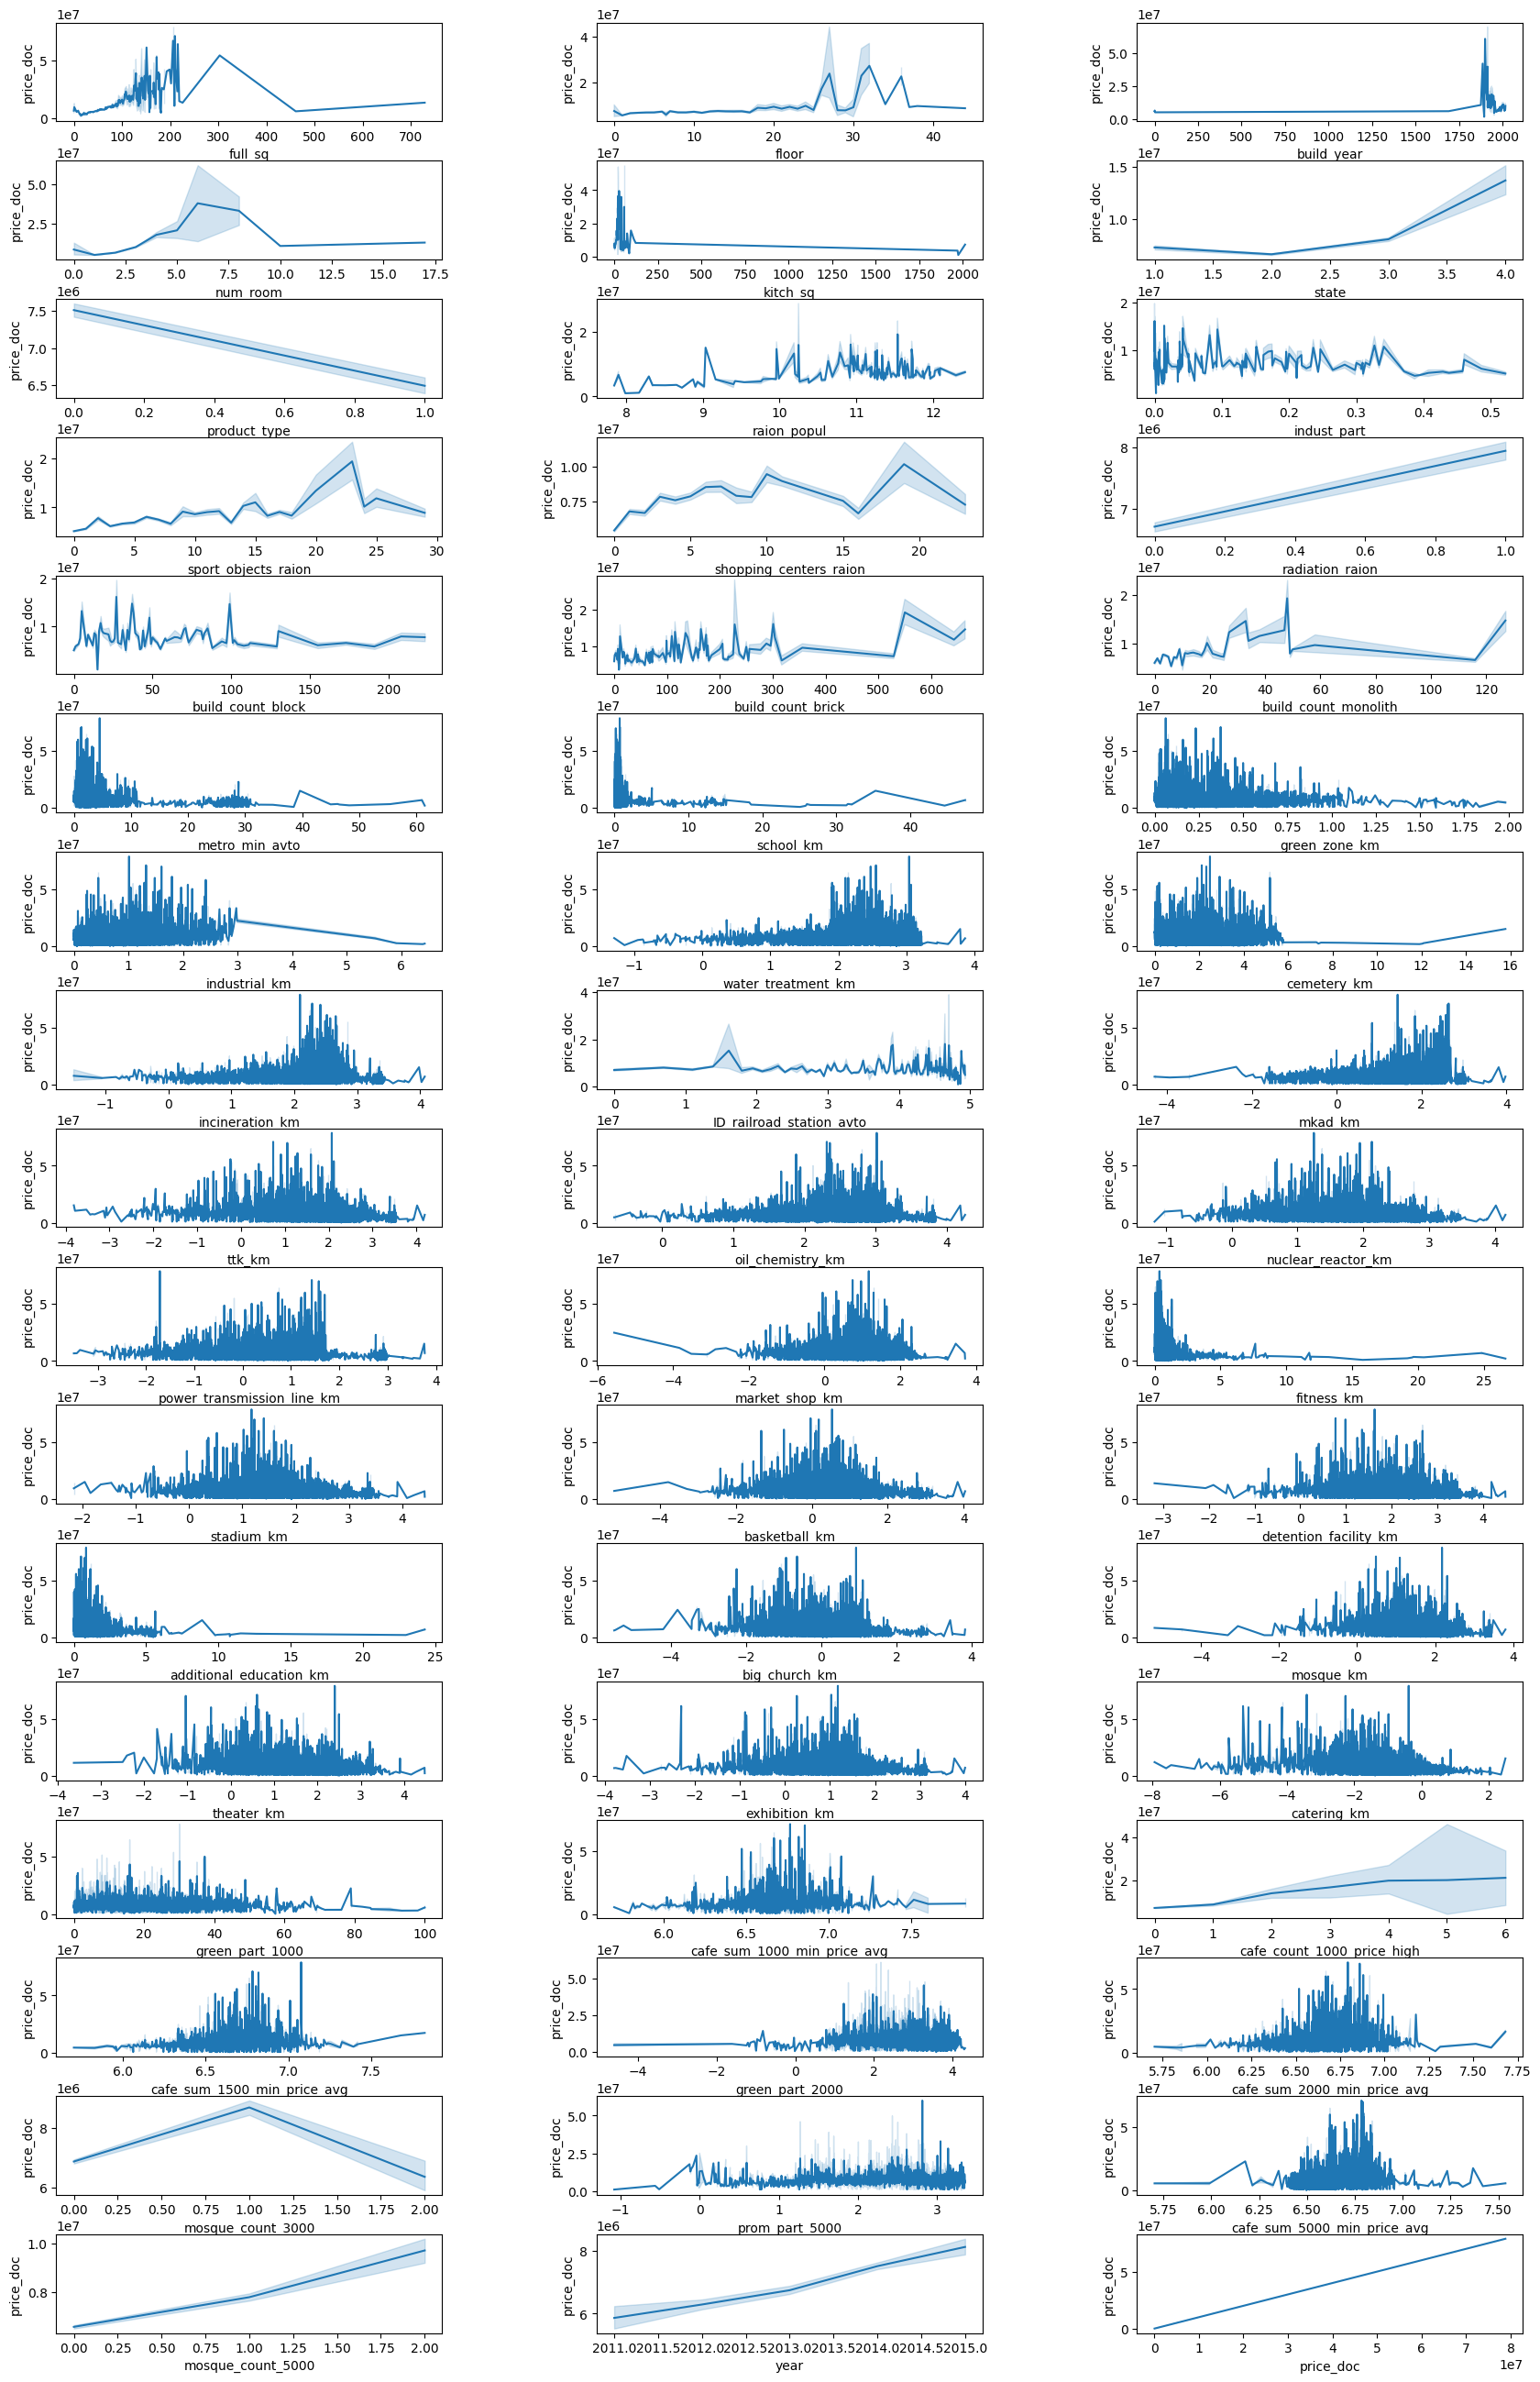

In [ ]:
fig = plt.figure(figsize=(20,9))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.lineplot(train_data.dropna(), x=col, y="price_doc");
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

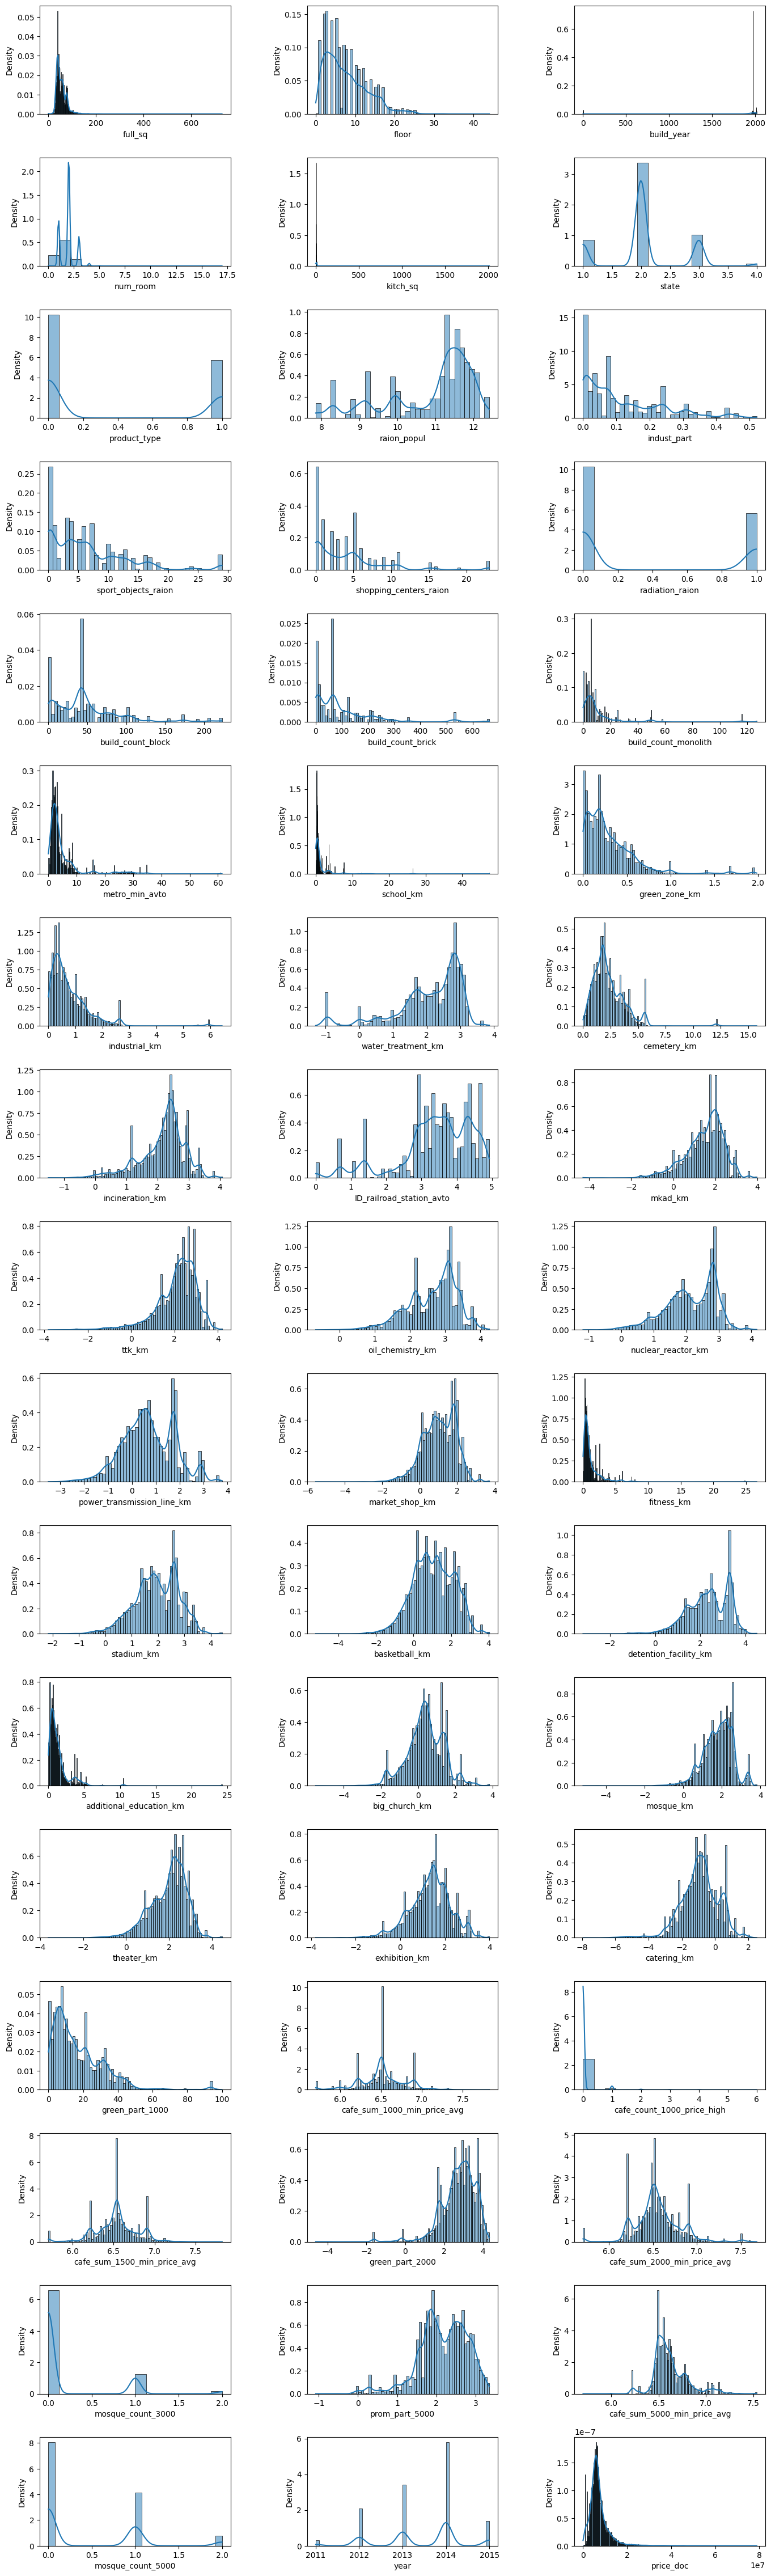

In [ ]:
# Let's take a look at the outliers
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

### Коробки

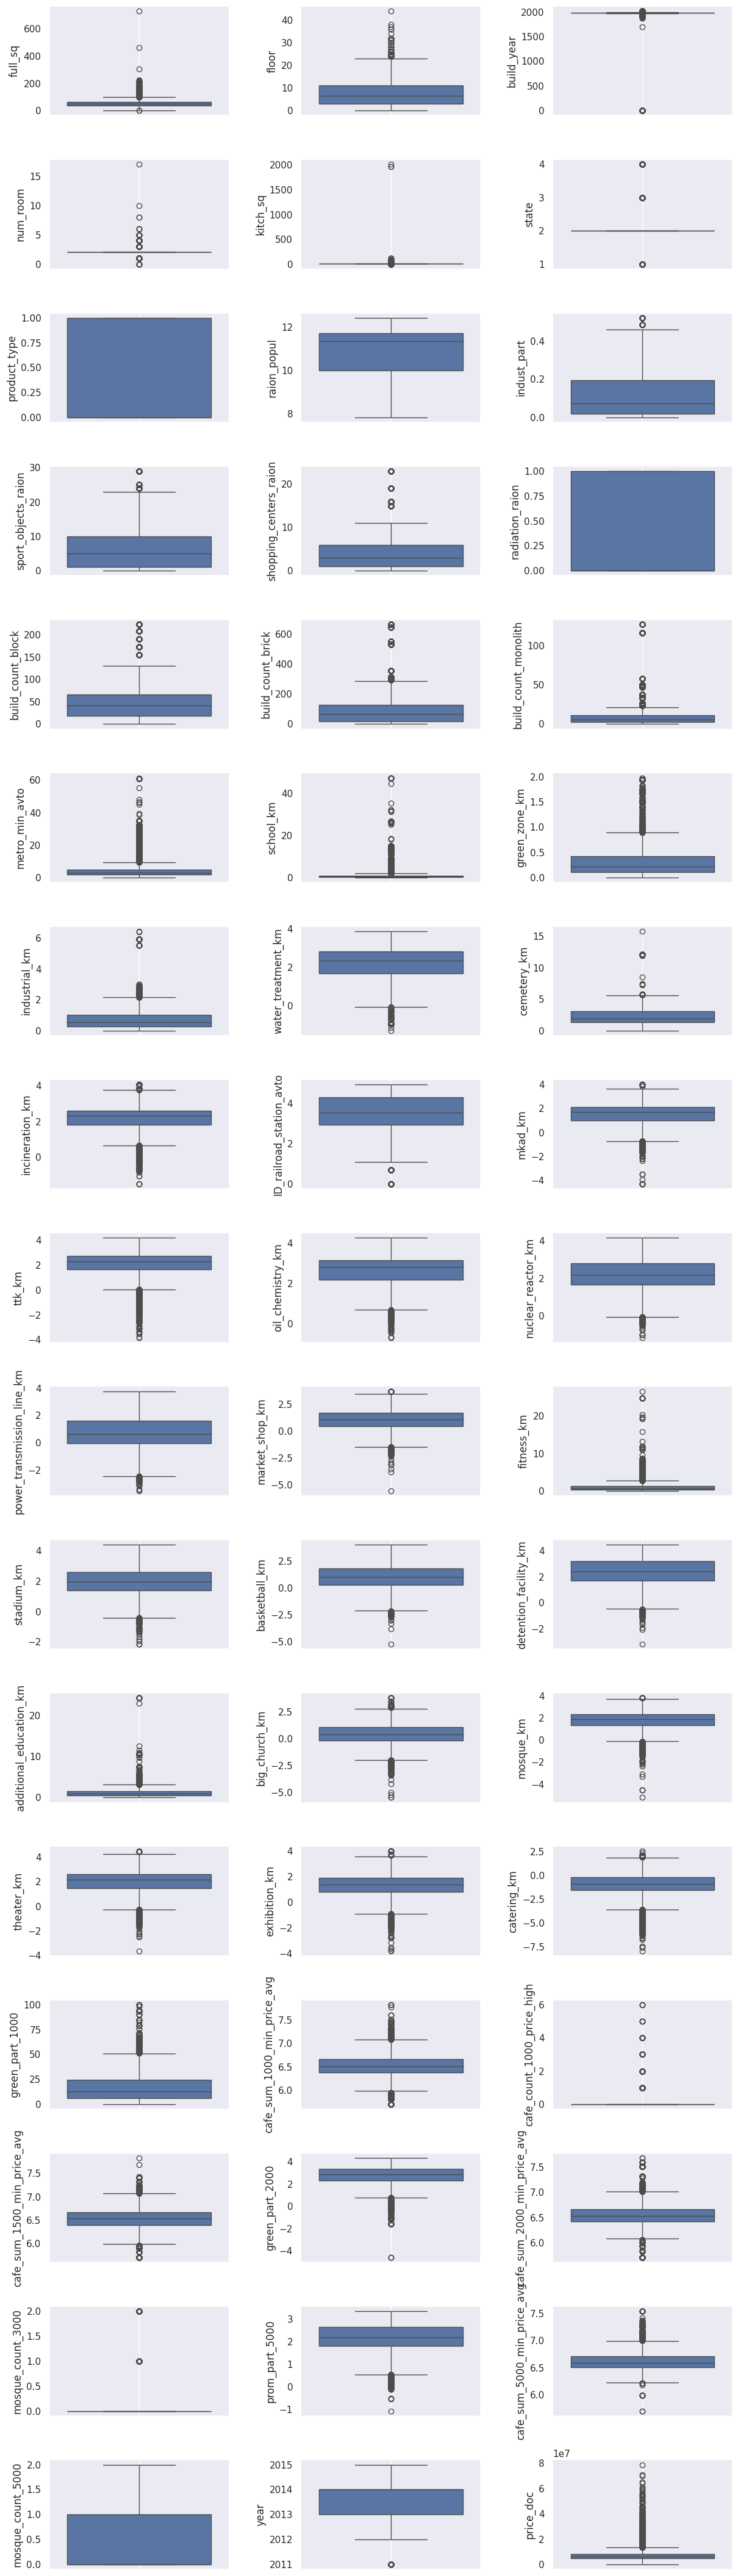

In [ ]:
# Check outliers
# Boxplot
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   kitch_sq                     21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   indust_part                  21329 non-null  float64
 4   radiation_raion              21329 non-null  int64  
 5   metro_min_avto               21329 non-null  float64
 6   school_km                    21329 non-null  float64
 7   green_zone_km                21329 non-null  float64
 8   mkad_km                      21329 non-null  float64
 9   market_shop_km               21329 non-null  float64
 10  fitness_km                   21329 non-null  float64
 11  additional_education_km      21329 non-null  float64
 12  big_church_km                21329 non-null  float64
 13  green_part_1000      

In [ ]:
condition = (test_data['full_sq']>=0)&(test_data['full_sq']<200)

n = test_data.loc[condition, 'full_sq']

test_data.full_sq.describe()

count    21329.000000
mean        54.088799
std         42.559522
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [ ]:
test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 200)]
test_data = test_data[test_data['kitch_sq'] < 500]
test_data = test_data[test_data['indust_part'] < 500]
test_data = test_data[test_data['metro_min_avto'] < 20]
test_data = test_data[test_data['school_km'] < 5]
test_data = test_data[test_data['green_zone_km'] < 1]
test_data = test_data[test_data['cemetery_km'] < 5]
test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -1)]
test_data = test_data[test_data['market_shop_km'].abs() < 2.5]
test_data = test_data[test_data['fitness_km'] < .5]
test_data = test_data[test_data['additional_education_km'] < .5]
test_data = test_data[test_data['big_church_km'].abs() < 2.5]
test_data = test_data[test_data['green_part_1000'] < 50]
test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

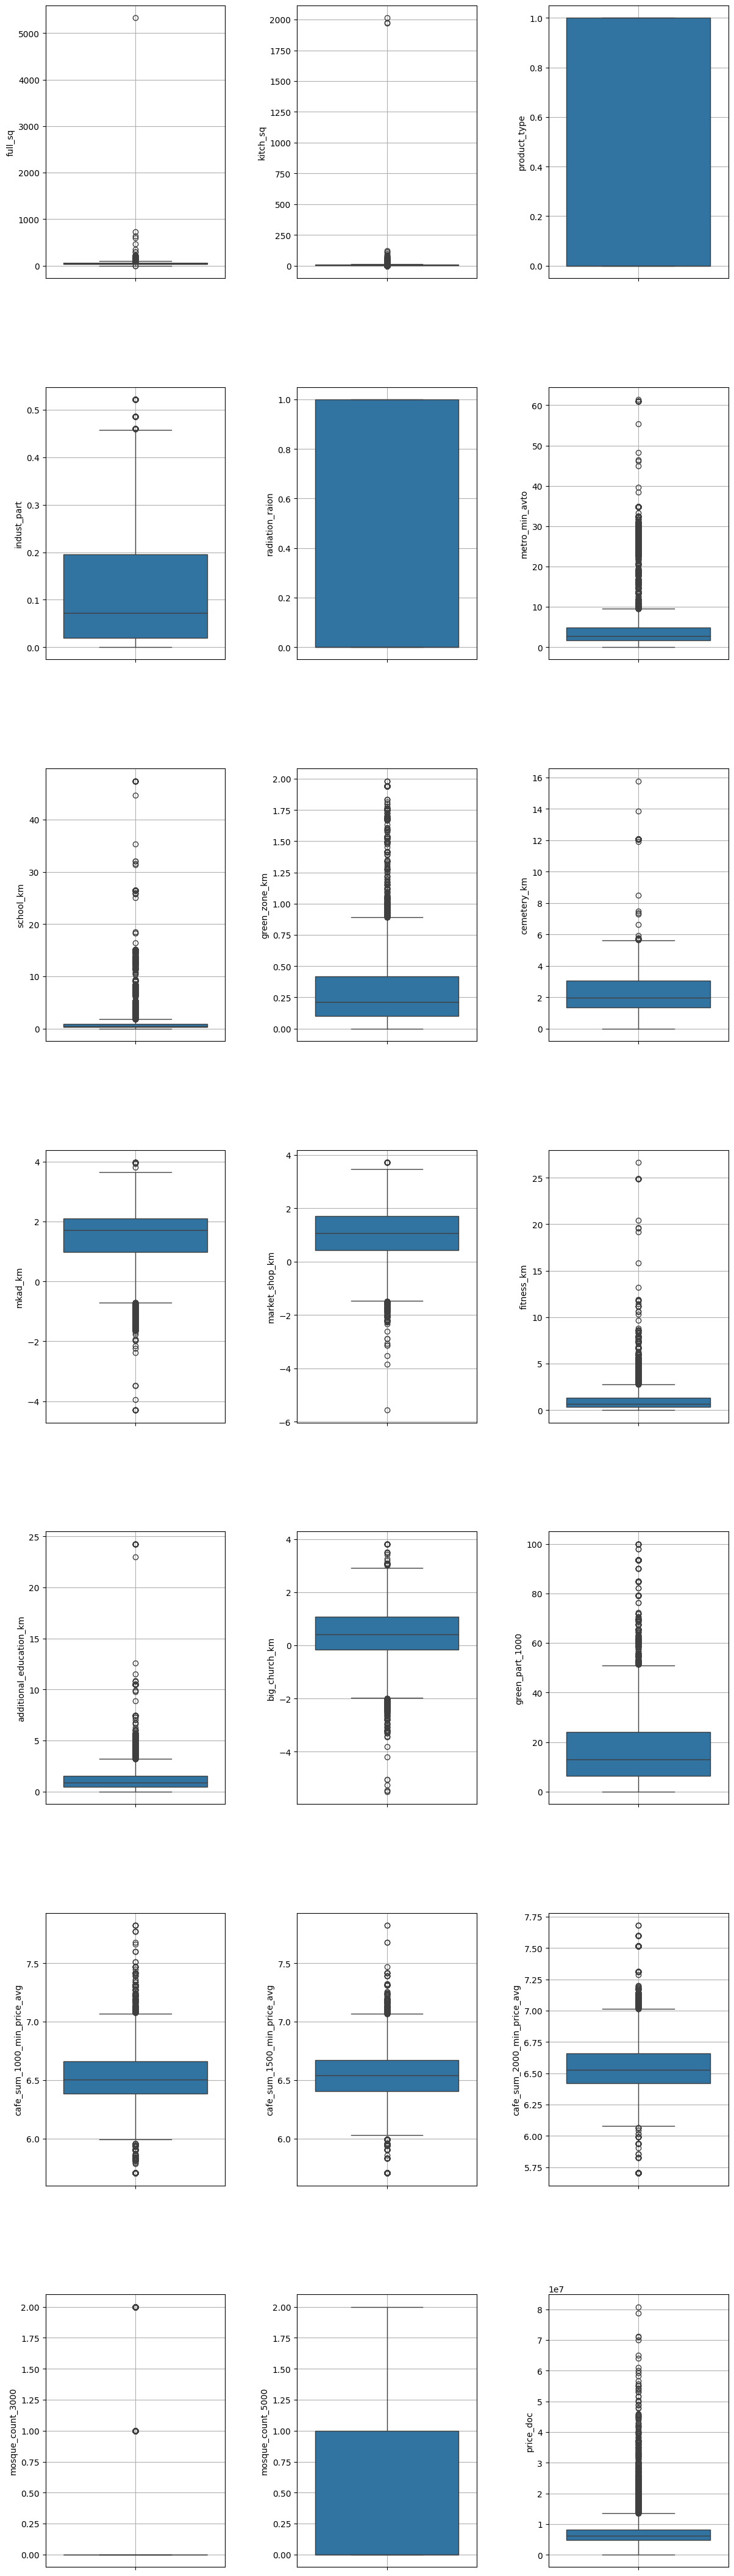

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.boxplot(y=col, data=test_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
df.price_doc.describe().apply(lambda x: format(x, 'f'))

count       21329.000000
mean      7117599.307516
std       4706342.297460
min        100000.000000
25%       4745995.000000
50%       6255454.000000
75%       8300000.000000
max      80777440.000000
Name: price_doc, dtype: object

In [ ]:
test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['metro_min_avto'] < 5]
test_data = test_data[test_data['school_km'] < .71]
test_data = test_data[test_data['green_zone_km'] < .5]
# test_data = test_data[test_data['cemetery_km'] < 5]
test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
test_data = test_data[test_data['fitness_km'] < .5]
test_data = test_data[test_data['additional_education_km'] < .5]
test_data = test_data[test_data['big_church_km'].abs() < 2.5]
test_data = test_data[test_data['green_part_1000'] < 33]
test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

In [ ]:
test_data['full_sq'].describe()

count    1706.000000
mean       51.590856
std        16.066986
min        13.000000
25%        38.000000
50%        49.000000
75%        62.000000
max        99.000000
Name: full_sq, dtype: float64

###🪝 Получение выборки с ключевыми признаками

In [ ]:
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'price_doc' ]]
test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   kitch_sq                     21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   indust_part                  21329 non-null  float64
 4   radiation_raion              21329 non-null  int64  
 5   metro_min_avto               21329 non-null  float64
 6   school_km                    21329 non-null  float64
 7   green_zone_km                21329 non-null  float64
 8   cemetery_km                  21329 non-null  float64
 9   market_shop_km               21329 non-null  float64
 10  fitness_km                   21329 non-null  float64
 11  additional_education_km      21329 non-null  float64
 12  big_church_km                21329 non-null  float64
 13  green_part_1000      

###🛒 Отбрасывание найденных выбросов

Средняя абсолютная ошибка (MAE): 1890227.78

Среднеквадратичная ошибка (MSE): 7663592182120.70

Корень из среднеквадратичной ошибки (RMSE): 2768319.38

Коэффициент детерминации (R^2): 0.44

In [ ]:
test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['metro_min_avto'] < 5]
test_data = test_data[test_data['school_km'] < .71]
test_data = test_data[test_data['green_zone_km'] < .5]
test_data = test_data[test_data['cemetery_km'] < 5]
# test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
test_data = test_data[test_data['fitness_km'] < .5]
test_data = test_data[test_data['additional_education_km'] < .5]
test_data = test_data[test_data['big_church_km'].abs() < 2.5]
test_data = test_data[test_data['green_part_1000'] < 33]
test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

###⚖️ Приравнивание медиане найденных выбросов


Средняя абсолютная ошибка (MAE): 2177534.51

Среднеквадратичная ошибка (MSE): 16529018740922.04

Корень из среднеквадратичной ошибки (RMSE): 4065589.59

Коэффициент детерминации (R^2): 0.24

In [ ]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].median()

# test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].median()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].median()

# test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].median()

# test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].median()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].median()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].median()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].median()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].median()

# test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].median()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].median()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].median()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].median()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].median()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].median()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].median()


###📏 Приравнивание среднему значению найденных выбросов


Средняя абсолютная ошибка (MAE): 2167381.97

Среднеквадратичная ошибка (MSE): 16239264769845.89

Корень из среднеквадратичной ошибки (RMSE): 4029797.11

Коэффициент детерминации (R^2): 0.26

In [ ]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].mean()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].mean()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].mean()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].mean()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].mean()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].mean()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].mean()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].mean()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].mean()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].mean()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].mean()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].mean()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].mean()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].mean()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].mean()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].mean()


###📐 Приравнивание стандартному отклонению значение найденных выбросов

Средняя абсолютная ошибка (MAE): 2374969.52

Среднеквадратичная ошибка (MSE): 19020678681735.27

Корень из среднеквадратичной ошибки (RMSE): 4361270.31

Коэффициент детерминации (R^2): 0.13

In [ ]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].std()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].std()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].std()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].std()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].std()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].std()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].std()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].std()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].std()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].std()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].std()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].std()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].std()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].std()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].std()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].std()


###🔩 Приравнивание дисперсии значение найденных выбросов

Средняя абсолютная ошибка (MAE): 2140302.40

Среднеквадратичная ошибка (MSE): 13160136737173.20

Корень из среднеквадратичной ошибки (RMSE): 3627690.28

Коэффициент детерминации (R^2): 0.40

In [ ]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].var()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].var()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].var()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].var()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].var()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].var()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].var()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].var()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].var()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].var()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].var()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].var()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].var()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].var()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].var()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].var()


###🎰 Создание дополнительных признаков

In [ ]:
test_data['mosque_count'] = (test_data['mosque_count_3000'] + test_data['mosque_count_5000'])/2.0
test_data['cafe_sum_price_avg'] = (test_data['cafe_sum_1000_min_price_avg'] + test_data['cafe_sum_1500_min_price_avg'] + test_data['cafe_sum_2000_min_price_avg'])/3.0


test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'mosque_count_3000', 'mosque_count_5000'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 5 to 21320
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  1727 non-null   int64  
 1   kitch_sq                 1727 non-null   float64
 2   product_type             1727 non-null   int64  
 3   indust_part              1727 non-null   float64
 4   radiation_raion          1727 non-null   int64  
 5   metro_min_avto           1727 non-null   float64
 6   school_km                1727 non-null   float64
 7   green_zone_km            1727 non-null   float64
 8   cemetery_km              1727 non-null   float64
 9   market_shop_km           1727 non-null   float64
 10  fitness_km               1727 non-null   float64
 11  additional_education_km  1727 non-null   float64
 12  big_church_km            1727 non-null   float64
 13  green_part_1000          1727 non-null   float64
 14  price_doc                172

In [ ]:
test_data['cafe_sum_price_avg'].describe()

count    1727.000000
mean        6.593406
std         0.162261
min         6.156982
25%         6.479074
50%         6.589568
75%         6.789232
max         6.907755
Name: cafe_sum_price_avg, dtype: float64

In [ ]:
test_data['kitch_sq_ration'] = test_data['kitch_sq'] / test_data['full_sq']


test_data.drop(columns = ['kitch_sq', 'full_sq'], inplace = True)

test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             21329 non-null  int64  
 1   indust_part              21329 non-null  float64
 2   radiation_raion          21329 non-null  int64  
 3   metro_min_avto           21329 non-null  float64
 4   school_km                21329 non-null  float64
 5   green_zone_km            21329 non-null  float64
 6   mkad_km                  21329 non-null  float64
 7   market_shop_km           21329 non-null  float64
 8   fitness_km               21329 non-null  float64
 9   additional_education_km  21329 non-null  float64
 10  big_church_km            21329 non-null  float64
 11  green_part_1000          21329 non-null  float64
 12  price_doc                21329 non-null  int64  
 13  mosque_count             21329 non-null  float64
 14  cafe_sum_price_avg       21

<ipython-input-143-913c0aa87f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['kitch_sq_ration'] = test_data['kitch_sq'] / test_data['full_sq']
<ipython-input-143-913c0aa87f81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns = ['kitch_sq', 'full_sq'], inplace = True)


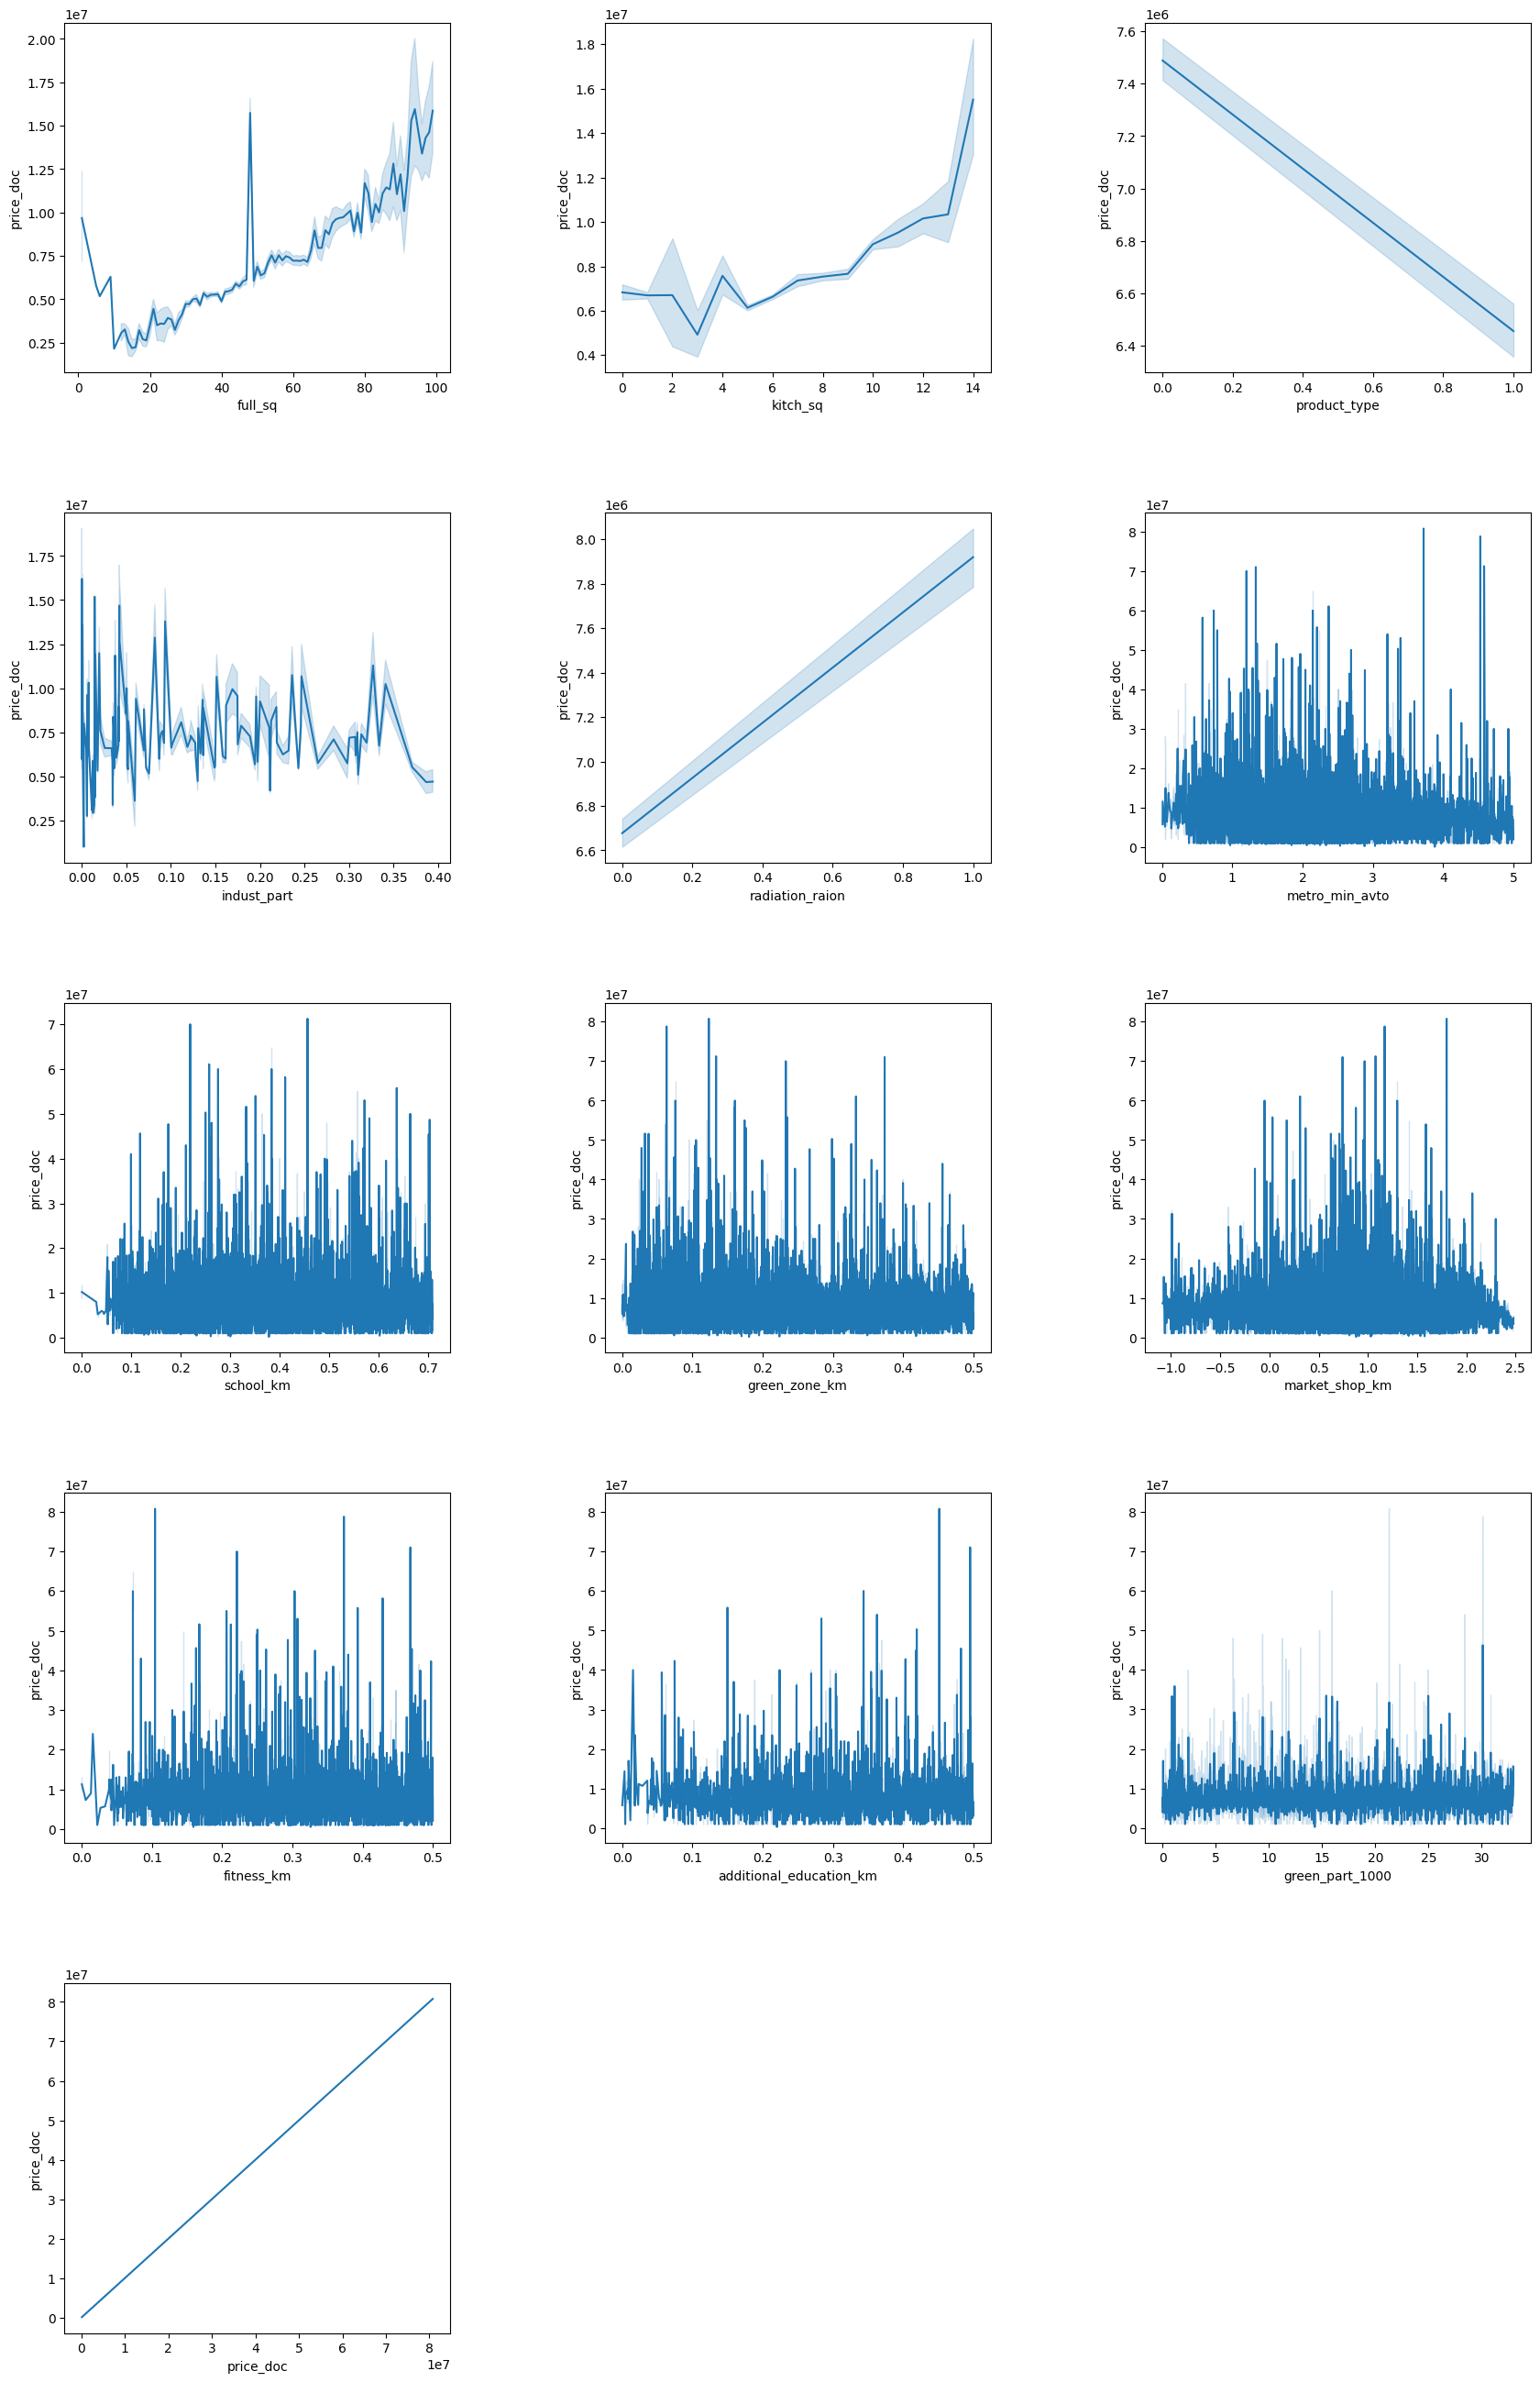

In [ ]:
fig = plt.figure(figsize=(20,9))
for index,col in enumerate(test_data):
    plt.subplot(5,3,index+1)
    sns.lineplot(test_data, x=col, y="price_doc");
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
test_data.mosque_count.describe()


count    21329.000000
mean         0.320198
std          0.478164
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          2.000000
Name: mosque_count, dtype: float64

In [ ]:
test_data.mosque_count.std()

0.4781643701735742

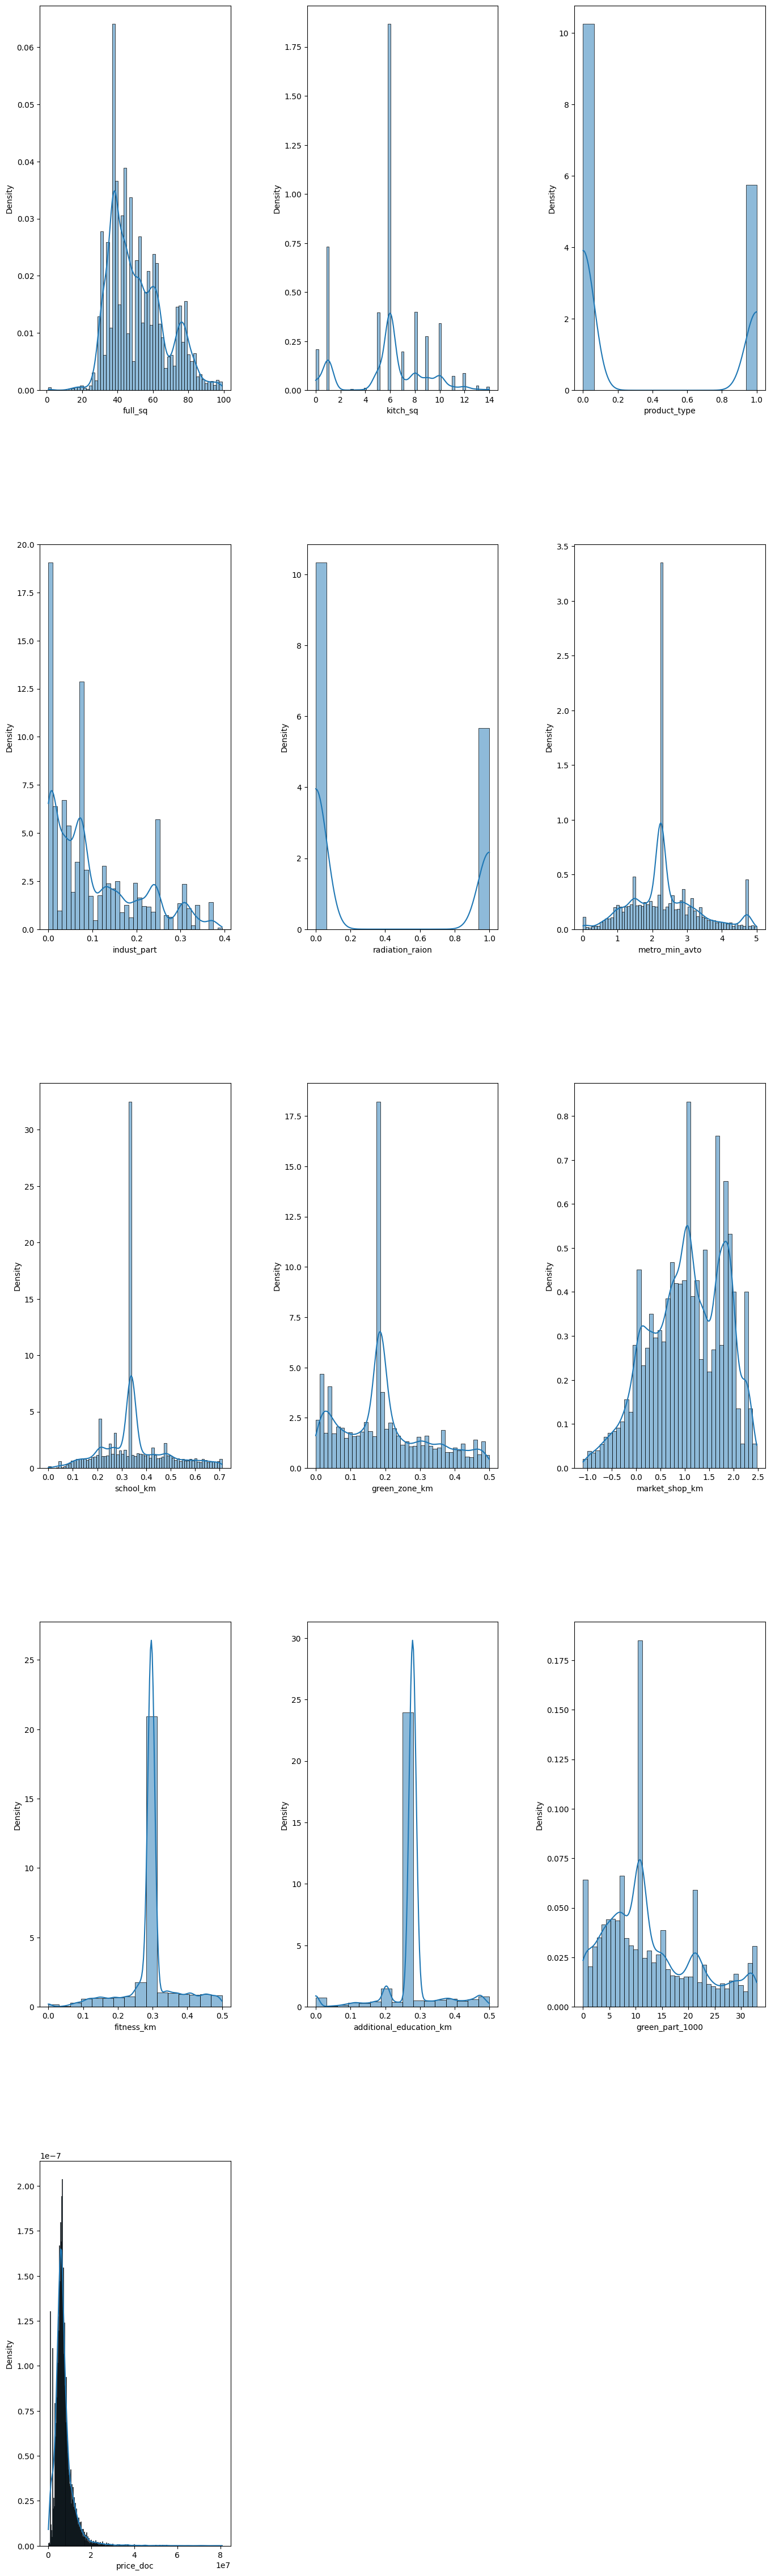

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(5,3,index+1)
    sns.histplot(test_data.loc[:,col], kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

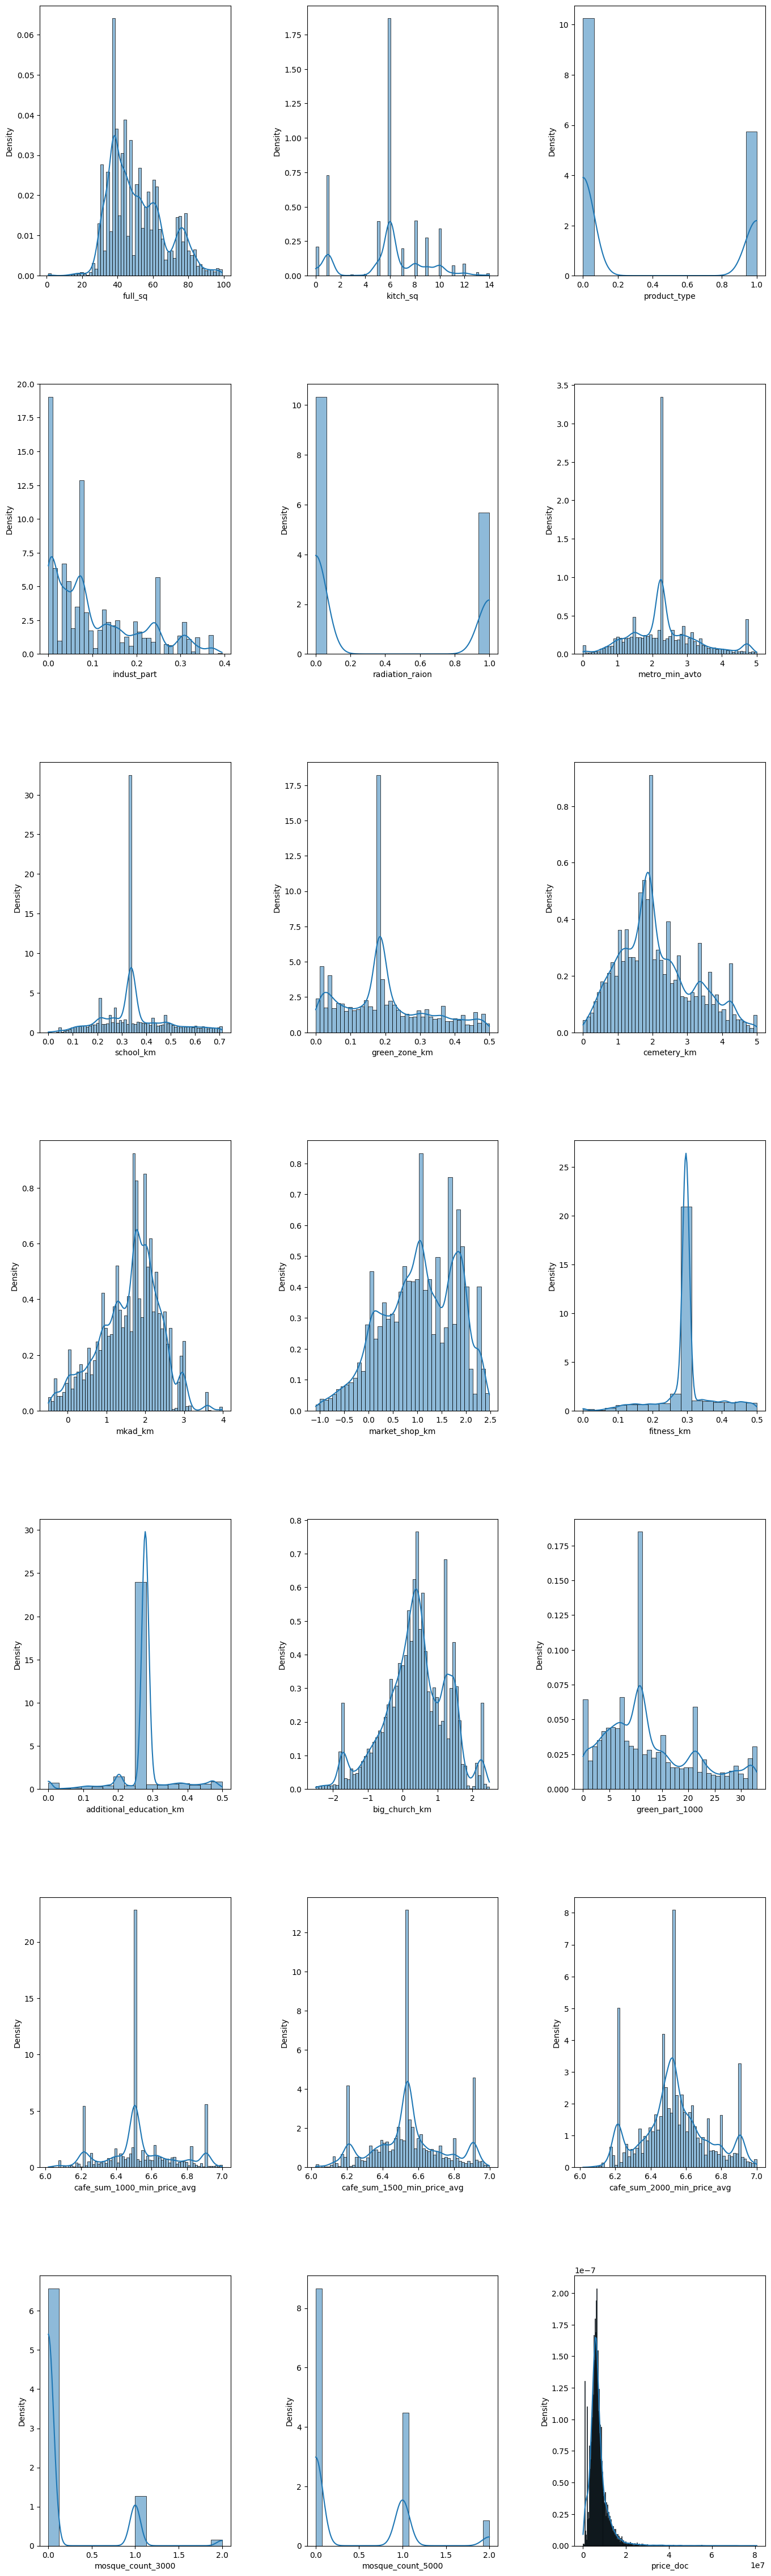

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(6,3,index+1)
    sns.histplot(test_data.loc[:,col], kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

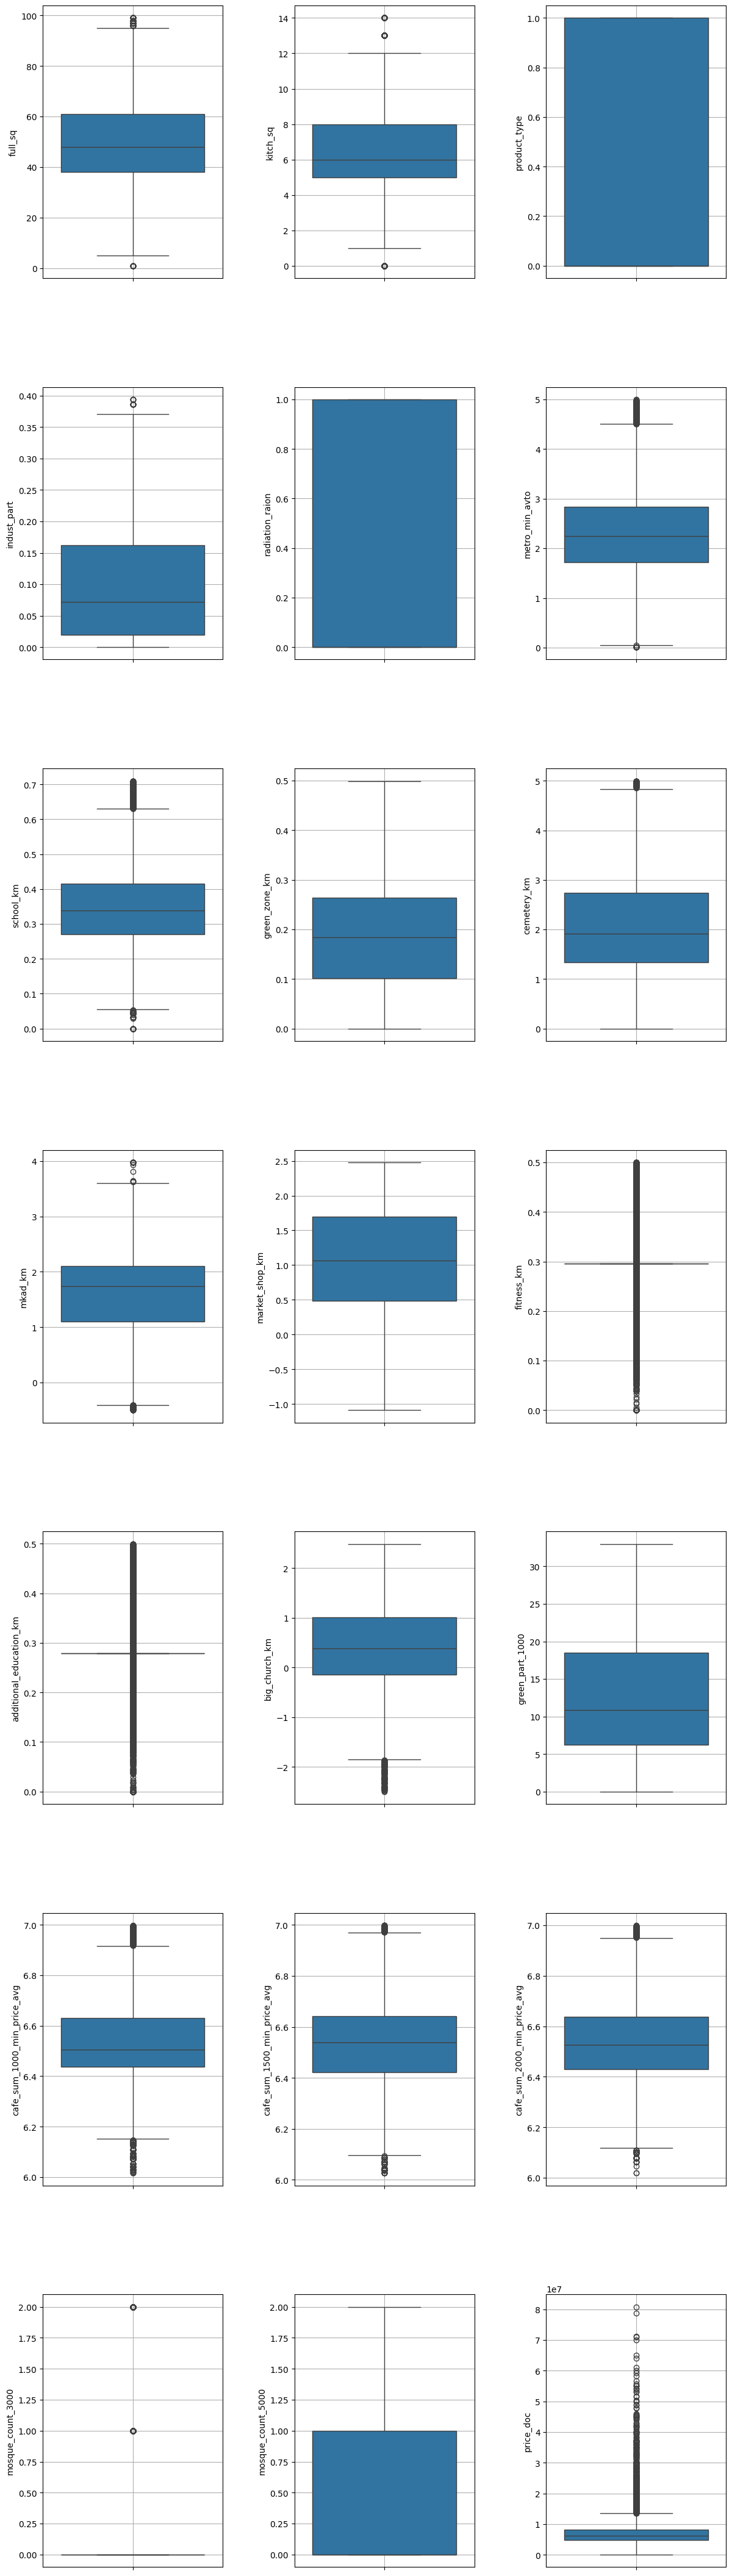

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.boxplot(y=col, data=test_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

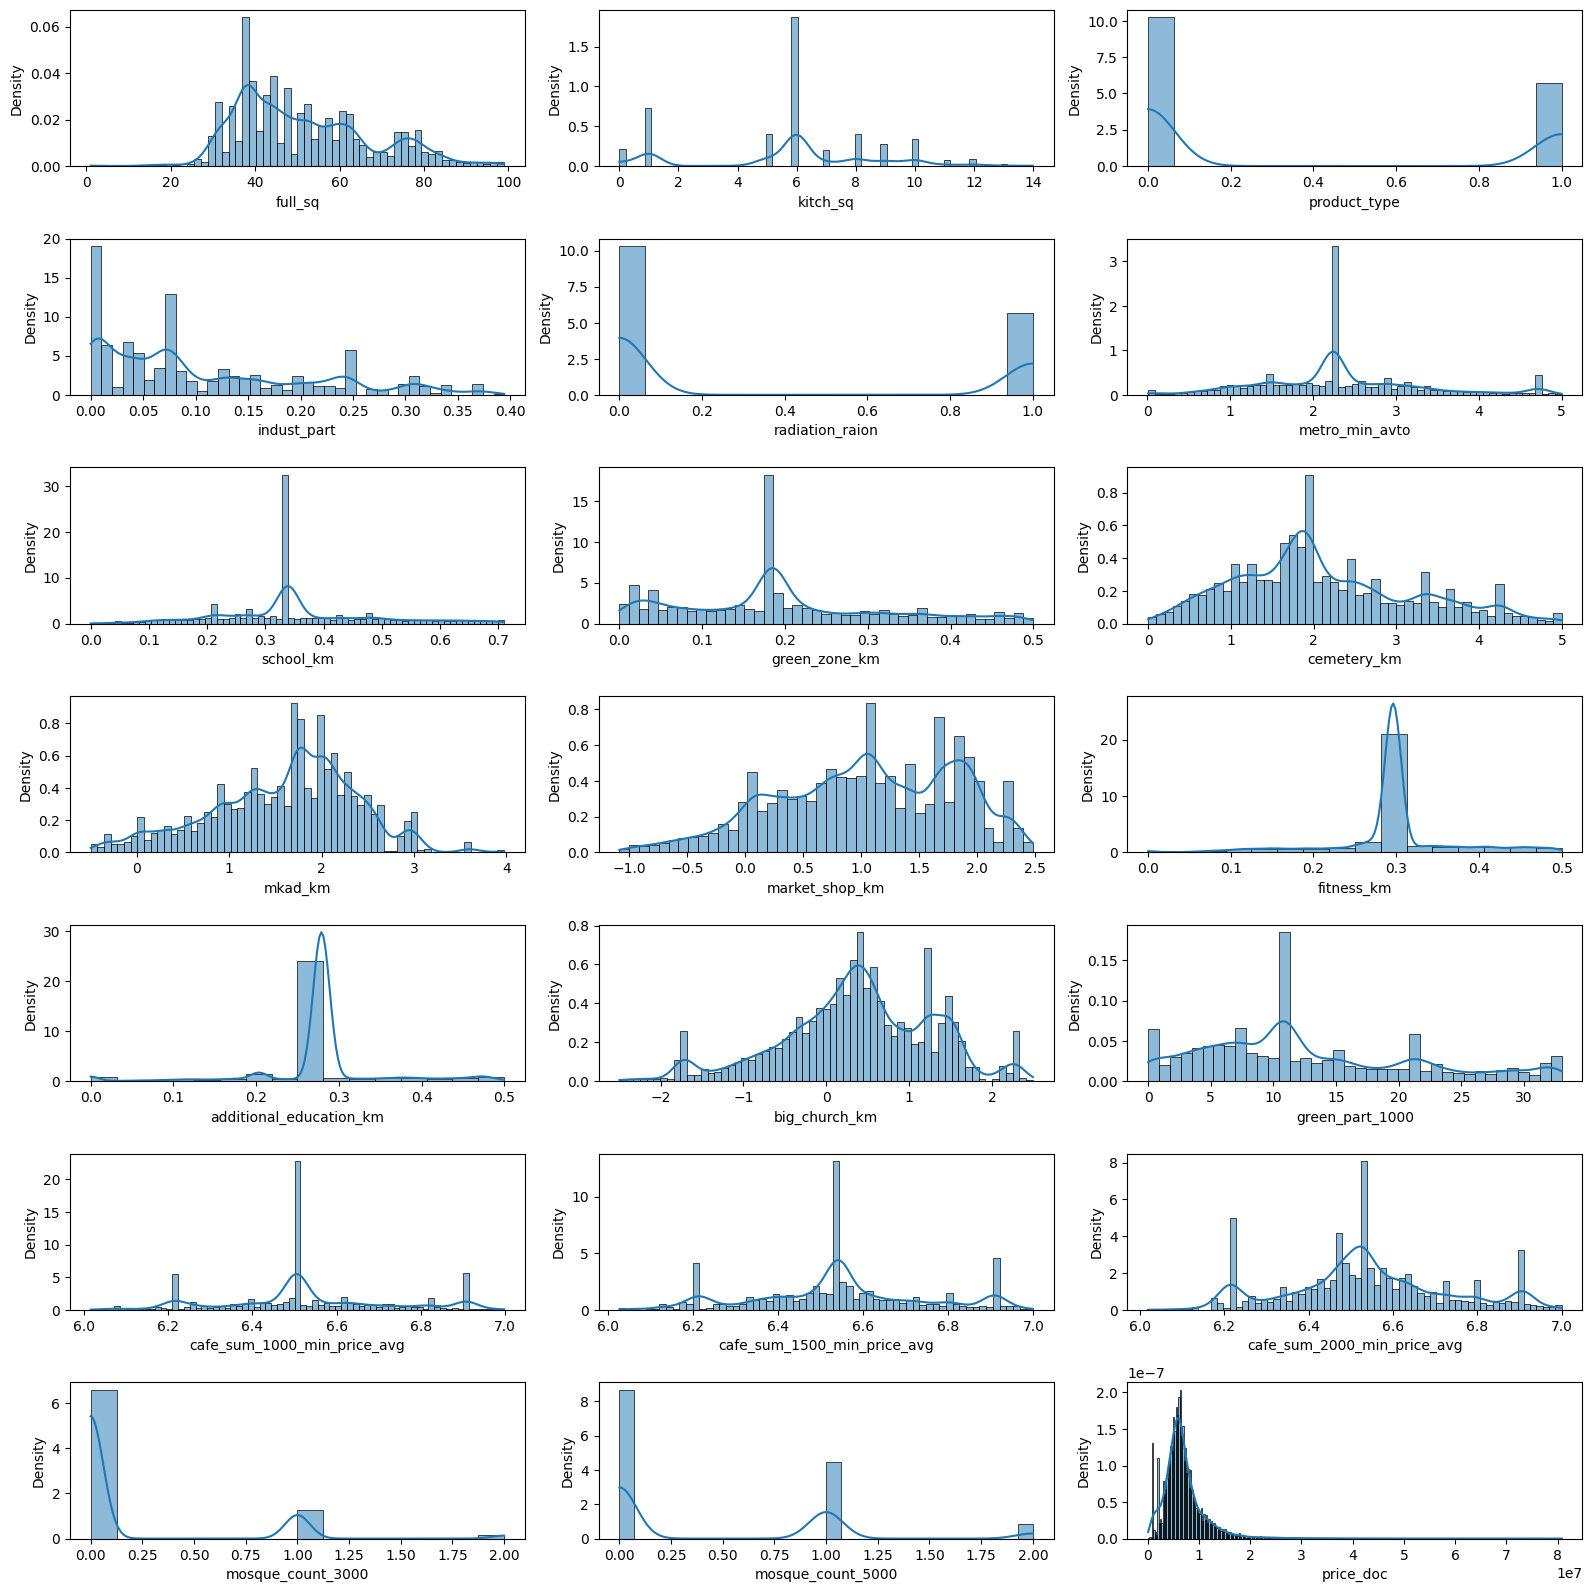

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

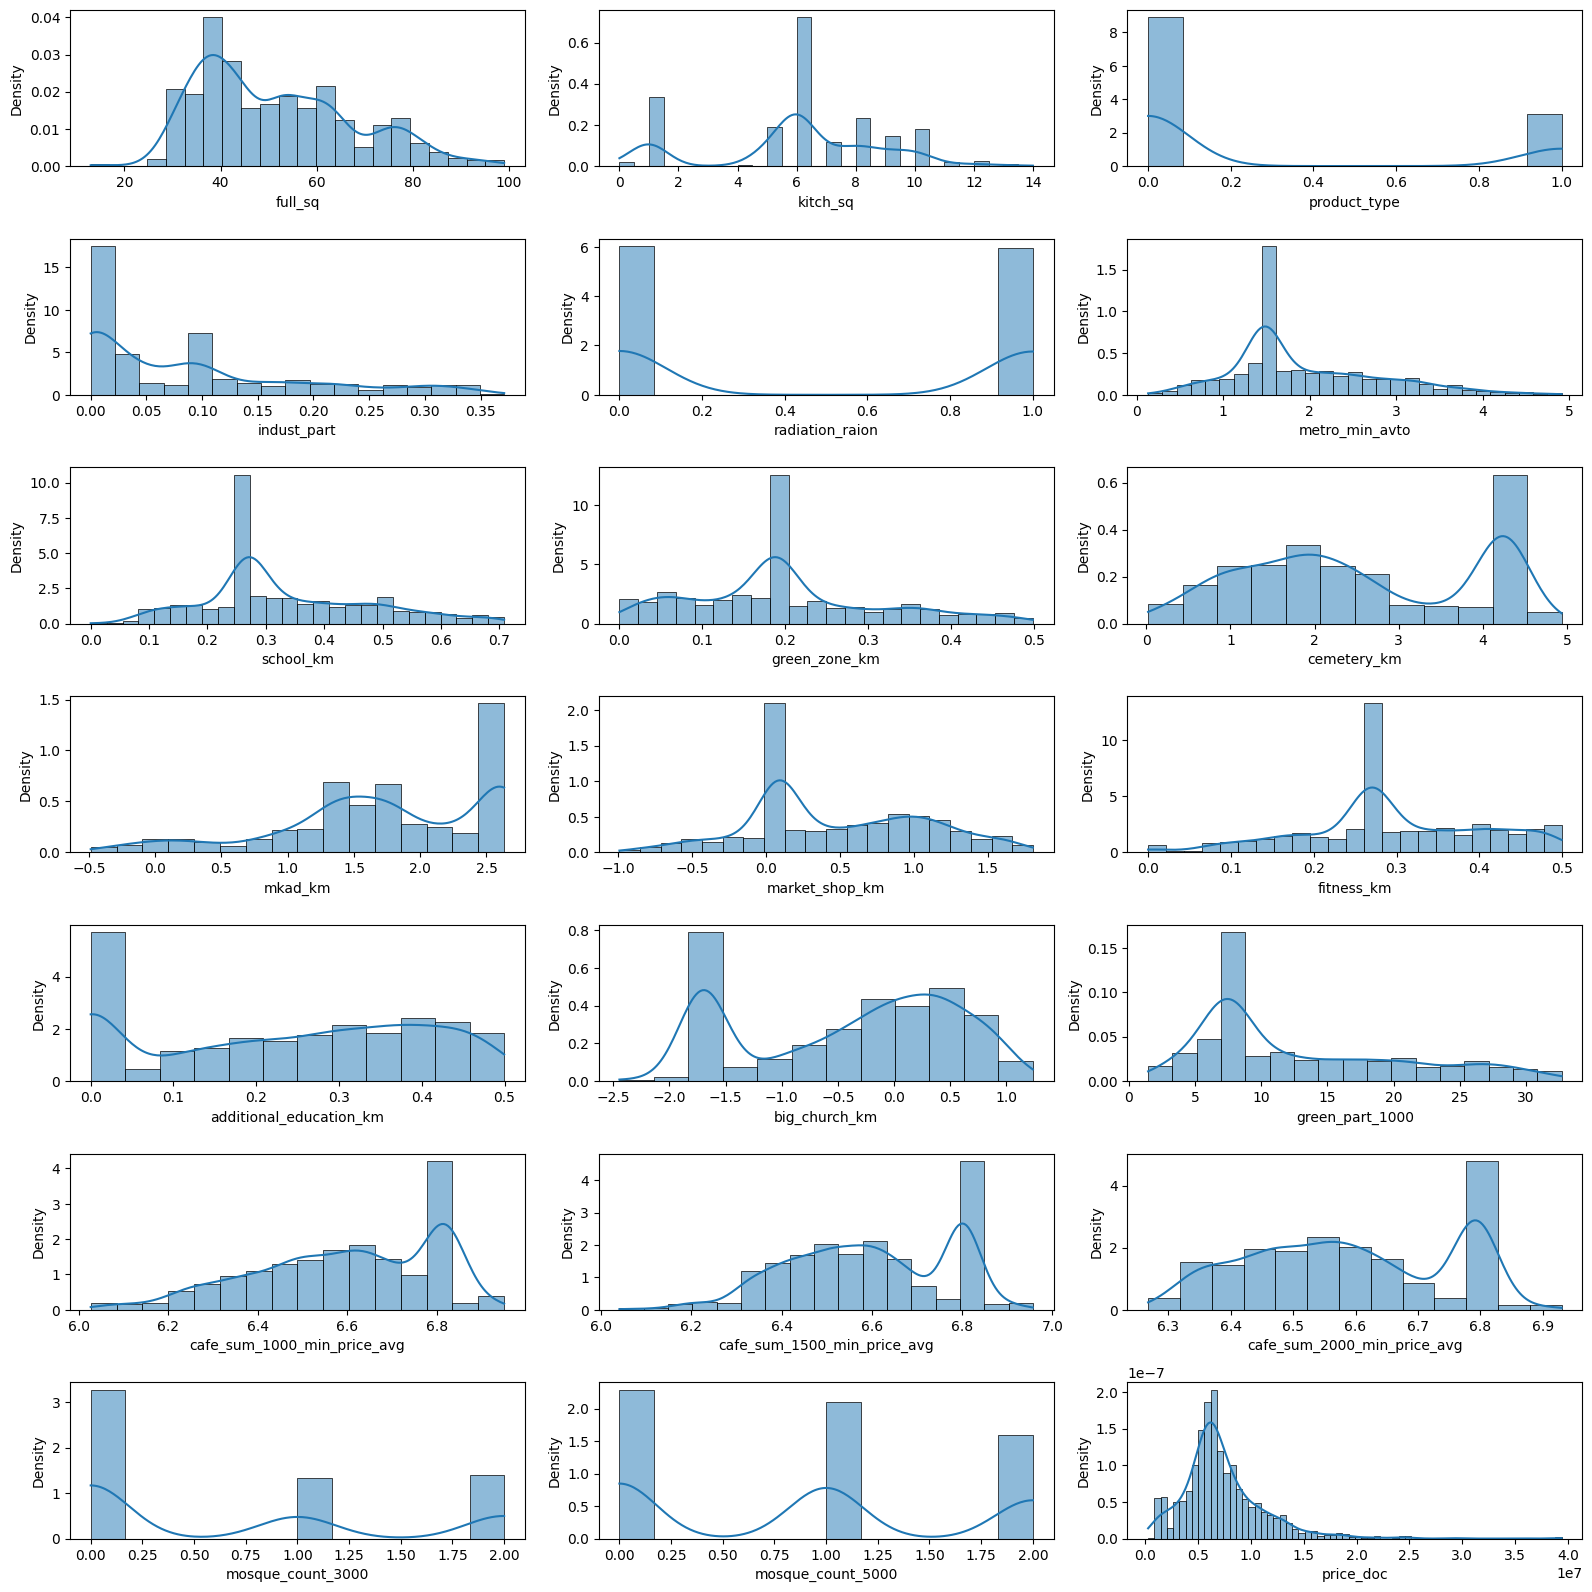

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                     1.000000
full_sq                       0.184494
mosque_count_5000             0.177839
kitch_sq                      0.127582
radiation_raion               0.126235
school_km                     0.102370
fitness_km                    0.100188
mosque_count_3000             0.098176
cafe_sum_2000_min_price_avg   0.063860
cafe_sum_1500_min_price_avg   0.056852
additional_education_km       0.047934
cemetery_km                   0.043069
green_zone_km                 0.016744
metro_min_avto                0.014541
cafe_sum_1000_min_price_avg   0.013768
green_part_1000               0.004248
indust_part                  -0.060880
product_type                 -0.105272
market_shop_km               -0.118966
big_church_km                -0.230745

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                     1.000000
full_sq                       0.367100
mosque_count_5000             0.177839
kitch_sq                      0.149632
cafe_sum_2000_min_price_avg   0.148960
radiation_raion               0.126235
cafe_sum_1500_min_price_avg   0.105167
cafe_sum_1000_min_price_avg   0.104695
mosque_count_3000             0.098176
school_km                     0.041758
cemetery_km                   0.035022
additional_education_km       0.032486
mkad_km                       0.015943
green_zone_km                 0.007571
green_part_1000               0.001049
fitness_km                   -0.034129
indust_part                  -0.057636
metro_min_avto               -0.091872
product_type                 -0.105272
market_shop_km               -0.125722
big_church_km                -0.227590

<Axes: >

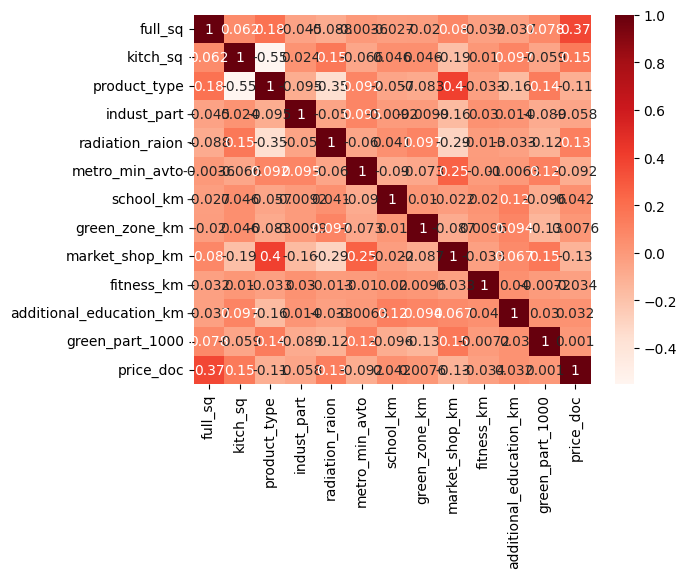

In [ ]:
sns.heatmap(test_data.corr(), annot=True,cmap='Reds')

<Axes: >

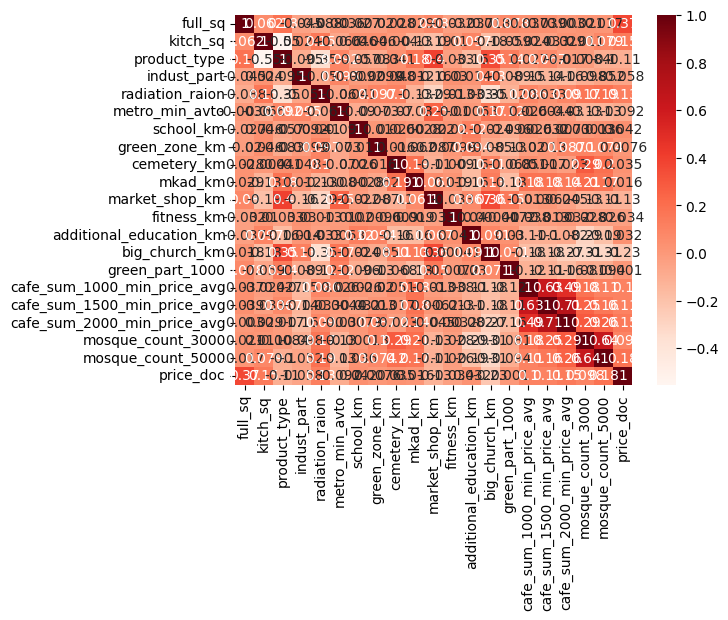

In [ ]:
sns.heatmap(test_data.corr(), annot=True,cmap='Reds')

### ☑️ Linear Regression
 * Score 4406908.0776

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 4575 to 3358
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      1543 non-null   int64  
 1   state                        1543 non-null   float64
 2   product_type                 1543 non-null   int64  
 3   raion_popul                  1543 non-null   float64
 4   indust_part                  1543 non-null   float64
 5   sport_objects_raion          1543 non-null   int64  
 6   shopping_centers_raion       1543 non-null   int64  
 7   radiation_raion              1543 non-null   int64  
 8   build_count_block            1543 non-null   float64
 9   build_count_brick            1543 non-null   float64
 10  build_count_monolith         1543 non-null   float64
 11  green_zone_km                1543 non-null   float64
 12  industrial_km                1543 non-null   float64
 13  water_treatment_km  

In [ ]:
model_linear = LinearRegression()

In [ ]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on train data
pred_train_linear = model_linear.predict(X_train)

r2_train = r2_score(y_train, pred_train_linear)
mse_train = mean_squared_error(y_train, pred_train_linear)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_linear)

In [ ]:
# Predict on validation data
pred_val_linear = model_linear.predict(X_val)

r2_val = r2_score(y_val, pred_val_linear)
mse_val = mean_squared_error(y_val, pred_val_linear)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_linear)

In [ ]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    2.162217e-01  2.231937e-01
MSE   7.690757e+12  7.400981e+12
RMSE  2.773221e+06  2.720474e+06
MAE   2.001661e+06  1.946152e+06

In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 1359457.14
Среднеквадратичная ошибка (MSE): 4342390364271.23
Корень из среднеквадратичной ошибки (RMSE): 2083840.29
Коэффициент детерминации (R^2): 0.44


In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 2010209.67
Среднеквадратичная ошибка (MSE): 7787066119862.51
Корень из среднеквадратичной ошибки (RMSE): 2790531.51
Коэффициент детерминации (R^2): 0.22


In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 1359457.14
Среднеквадратичная ошибка (MSE): 4342390364271.23
Корень из среднеквадратичной ошибки (RMSE): 2083840.29
Коэффициент детерминации (R^2): 0.44


### ✅ Feature Scaling

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
#       z = (x - u) / s
transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)

In [ ]:
X_prep.shape

(8539, 26)

In [ ]:
# Polynomial Features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(X_prep)
poly_features = polynomial_converter.transform(X_prep)

poly_features.shape

(8539, 377)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 377 features, but LinearRegression is expecting 26 features as input.

### ✔️ L2 Regularization - Ridge Regression

In [ ]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
# Predict on train data
pred_train_ridge = model_ridge.predict(X_train)

r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [ ]:
# Predict on validation data
pred_val_ridge = model_ridge.predict(X_val)

r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [ ]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.127087e-01  5.586039e-01
MSE   5.000962e+12  3.749838e+12
RMSE  2.236283e+06  1.936450e+06
MAE   1.401163e+06  1.243962e+06

In [ ]:
# Cross-validation method to evaluate model
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01), scoring='neg_mean_absolute_error')

In [ ]:
model_ridge_cv.fit(X_train, y_train)

print("alpha: ", model_ridge_cv.alpha_)

alpha:  0.01


In [ ]:
# Predict on validation data
pred_val_ridge = model_ridge_cv.predict(X_val)

r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [ ]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val, mse_val, rmse_val, mae_val],
               'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2    4.127087e-01  4.098308e-01
MSE   5.000962e+12  5.025468e+12
RMSE  2.236283e+06  2.236283e+06
MAE   1.401163e+06  1.406678e+06

In [ ]:
# Finally, predict on test data
pred_test_ridge = model_ridge_cv.predict(X_test)

r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_ridge:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_ridge:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_ridge:.2f}")

Средняя абсолютная ошибка (MAE): 1312719.92
Среднеквадратичная ошибка (MSE): 4251418748648.22
Корень из среднеквадратичной ошибки (RMSE): 2236283.04
Коэффициент детерминации (R^2): 0.46


### ✔️ L1 Regularization - Lasso Regression
 *   Score 4500025.127

In [ ]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+15, tolerance: 3.808e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
# Predict on train data
pred_train_lasso = model_lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train)
mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [ ]:
# Predict on validation data
pred_val_lasso = model_lasso.predict(X_val)

r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Training': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.098281e-01  5.588406e-01
MSE   5.025491e+12  3.747827e+12
RMSE  2.236283e+06  1.936450e+06
MAE   1.406683e+06  1.245166e+06

In [ ]:
# Cross-validation method to evaluate model
#model_lasso_cv = LassoCV(eps=0.01, n_alphas=50000, cv=10)
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [ ]:
model_lasso_cv.fit(X_train, y_train)

print("alpha: ", model_lasso_cv.alpha_)

alpha:  23624.84686380325


In [ ]:
# Predict on validation data
pred_val_lasso2 = model_lasso_cv.predict(X_val)

r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [ ]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Validation 2': [r2_val2_lasso, mse_val2_lasso, rmse_val2_lasso, mae_val2_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2    4.098281e-01  4.392573e-01
MSE   5.025491e+12  4.774892e+12
RMSE  2.236283e+06  2.236283e+06
MAE   1.406683e+06  1.355222e+06

In [ ]:
model_lasso_cv.coef_

array([ 1.61216546e+06,  0.00000000e+00,  0.00000000e+00, -2.21245005e+04,
        1.17979646e+05,  3.02751648e+05,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -9.30809132e+04, -4.16194828e+04,
       -1.33240301e+05, -3.50168353e+05,  0.00000000e+00, -4.69490910e+04,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -9.25211295e+04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.36439495e+04,
        0.00000000e+00,  2.76408117e+05, -5.10388440e+04, -0.00000000e+00,
        1.09706532e+05, -2.07092500e+04, -0.00000000e+00,  0.00000000e+00,
        1.76293090e+04,  0.00000000e+00,  3.67039826e+03, -0.00000000e+00,
       -1.23835623e+05, -7.66052916e+04, -0.00000000e+00, -6.53411981e+04,
        5.58076978e+04, -5.68902086e+04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.06241064e+04, -8.80759817e+03, -0.00000000e+00,
       -0.00000000e+00, -4.87923030e+04,  1.67352451e+03,  9.82625606e+04,
        0.00000000e+00,  

In [ ]:
# Finally, predict on test data
pred_test_lasso = model_lasso_cv.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_lasso:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_lasso:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_lasso:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_lasso:.2f}")

Средняя абсолютная ошибка (MAE): 1249577.15
Среднеквадратичная ошибка (MSE): 4035892772099.58
Корень из среднеквадратичной ошибки (RMSE): 2236283.04
Коэффициент детерминации (R^2): 0.48


### ✔️XGBRegressor

In [ ]:
# Fit the model
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on train data
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [ ]:
# Predict on validation data
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_xgbr, mse_val_xgbr, rmse_val_xgbr, mae_val_xgbr],
               'Training': [r2_train_xgbr, mse_train_xgbr, rmse_train_xgbr, mae_train_xgbr],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.534978e-01  5.167622e-01
MSE   4.653630e+12  4.105300e+12
RMSE  2.157227e+06  2.026154e+06
MAE   1.369546e+06  1.311287e+06

In [ ]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_xgbr:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_xgbr:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_xgbr:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_xgbr:.2f}")

Средняя абсолютная ошибка (MAE): 1275810.95
Среднеквадратичная ошибка (MSE): 4040543705101.96
Корень из среднеквадратичной ошибки (RMSE): 2010110.37
Коэффициент детерминации (R^2): 0.48


## 📝 Выводы

Text(0.5, 1.0, 'Comparing R2 Score of Models')

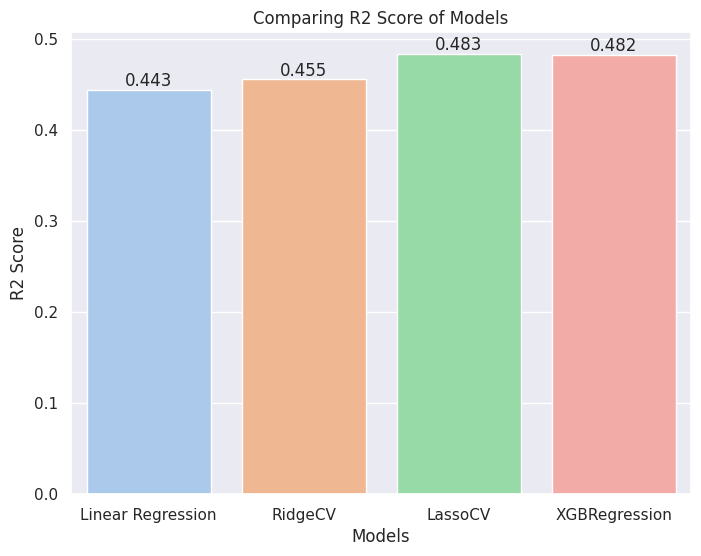

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_palette(palette = 'pastel')

models = ['Linear Regression', 'RidgeCV', 'LassoCV', 'XGBRegression']
r2 = [r2_test_linear, r2_test_ridge, r2_test_lasso, r2_test_xgbr]
ax = sns.barplot(x = models, y = r2, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models')

Text(0.5, 1.0, 'Comparing RMSE of Models')

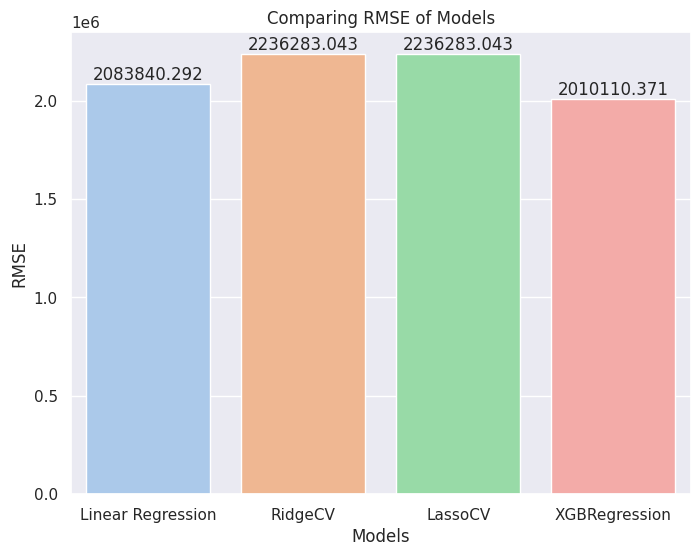

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_palette(palette = 'pastel')

rmse = [rmse_test_linear, rmse_test_ridge, rmse_test_lasso, rmse_test_xgbr]
ax = sns.barplot(x = models, y = rmse, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models')

Text(0.5, 1.0, 'Comparing MAE of Models')

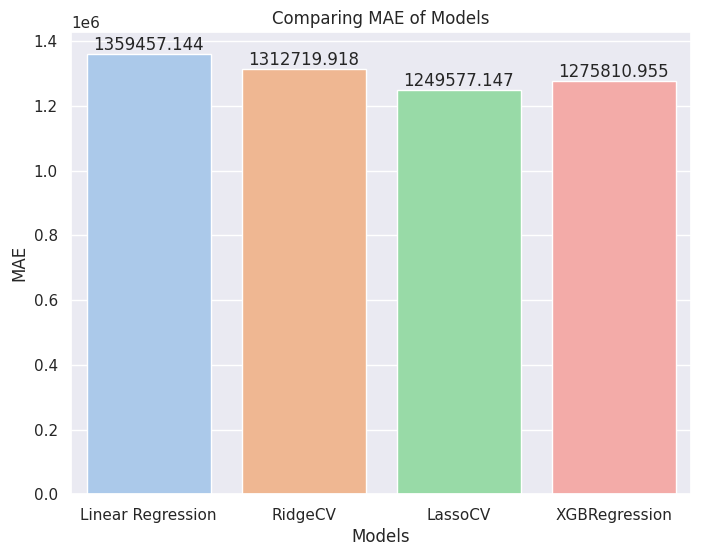

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_palette(palette = 'pastel')

mae = [mae_test_linear, mae_test_ridge, mae_test_lasso, mae_test_xgbr]
ax = sns.barplot(x = models, y = mae, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparing MAE of Models')

## 🔮Предсказание целевого значения

In [ ]:
submission = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/starting_k/submission.csv', index_col=0)

In [ ]:
submission

price_doc
0     7.135718e+06
1     7.135718e+06
2     7.135718e+06
3     7.135718e+06
4     7.135718e+06
...            ...
9137  7.135718e+06
9138  7.135718e+06
9139  7.135718e+06
9140  7.135718e+06
9141  7.135718e+06

[9142 rows x 1 columns]

In [ ]:
test_df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/starting_k/test.csv', index_col=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   floor                        9142 non-null   float64
 2   build_year                   9142 non-null   float64
 3   num_room                     9142 non-null   float64
 4   kitch_sq                     9142 non-null   float64
 5   state                        9142 non-null   float64
 6   product_type                 9142 non-null   int64  
 7   raion_popul                  9142 non-null   float64
 8   indust_part                  9142 non-null   float64
 9   sport_objects_raion          9142 non-null   int64  
 10  shopping_centers_raion       9142 non-null   int64  
 11  radiation_raion              9142 non-null   int64  
 12  build_count_block            9142 non-null   float64
 13  build_count_brick      

In [ ]:
test_slice = test_df[['full_sq', 'kitch_sq','product_type','raion_popul','indust_part','sport_objects_raion','shopping_centers_raion','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   kitch_sq                     9142 non-null   float64
 2   product_type                 9142 non-null   int64  
 3   indust_part                  9142 non-null   float64
 4   radiation_raion              9142 non-null   int64  
 5   metro_min_avto               9142 non-null   float64
 6   school_km                    9142 non-null   float64
 7   green_zone_km                9142 non-null   float64
 8   cemetery_km                  9142 non-null   float64
 9   market_shop_km               9142 non-null   float64
 10  fitness_km                   9142 non-null   float64
 11  additional_education_km      9142 non-null   float64
 12  big_church_km                9142 non-null   float64
 13  green_part_1000        

In [ ]:
test_slice.loc[~((test_slice['full_sq'] > 0)&(test_slice['full_sq'] < 100)),'full_sq'] = test_slice.loc[(test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100),'full_sq' ].median()

test_slice.loc[~((test_slice['kitch_sq'] < 15)&(test_slice['kitch_sq'] >= 0)),'kitch_sq'] = test_slice.loc[(test_slice['kitch_sq'] < 15)&(test_slice['kitch_sq'] >= 0),'kitch_sq'].median()

test_slice.loc[~(test_slice['indust_part'] < .4),'indust_part'] = test_slice.loc[(test_slice['indust_part'] < .4),'indust_part'].median()

test_slice.loc[~(test_slice['metro_min_avto'] < 5),'metro_min_avto'] = test_slice.loc[(test_slice['metro_min_avto'] < 5),'metro_min_avto'].median()

test_slice.loc[~(test_slice['school_km'] < .71),'school_km'] = test_slice.loc[(test_slice['school_km'] < .71),'school_km'].median()

test_slice.loc[~(test_slice['green_zone_km'] < .5),'green_zone_km'] = test_slice.loc[(test_slice['green_zone_km'] < .5),'green_zone_km'].median()

test_slice.loc[~(test_slice['cemetery_km'] < 5),'cemetery_km'] = test_slice.loc[(test_slice['cemetery_km'] < 5),'cemetery_km'].median()

# test_slice.loc[~((test_slice['mkad_km'] < 4)&(test_slice['mkad_km'] > -.5)),'mkad_km'] = test_slice.loc[((test_slice['mkad_km'] < 4)&(test_slice['mkad_km'] > -.5)),'mkad_km'].median()

test_slice.loc[~((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)),'market_shop_km'] = test_slice.loc[((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)),'market_shop_km'].median()

test_slice.loc[~(test_slice['fitness_km'] < .5),'fitness_km'] = test_slice.loc[(test_slice['fitness_km'] < .5),'fitness_km'].median()

test_slice.loc[~(test_slice['additional_education_km'] < .5),'additional_education_km'] = test_slice.loc[(test_slice['additional_education_km'] < .5),'additional_education_km'].median()

test_slice.loc[~(test_slice['big_church_km'].abs() < 2.5),'big_church_km'] = test_slice.loc[(test_slice['big_church_km'].abs() < 2.5),'big_church_km'].median()

test_slice.loc[~(test_slice['green_part_1000'] < 33),'green_part_1000'] = test_slice.loc[(test_slice['green_part_1000'] < 33),'green_part_1000'].median()

test_slice.loc[~((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].median()

test_slice.loc[~((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].median()

test_slice.loc[~((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].median()

In [ ]:
test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   kitch_sq                     9142 non-null   float64
 2   product_type                 9142 non-null   int64  
 3   indust_part                  9142 non-null   float64
 4   radiation_raion              9142 non-null   int64  
 5   metro_min_avto               9142 non-null   float64
 6   school_km                    9142 non-null   float64
 7   green_zone_km                9142 non-null   float64
 8   cemetery_km                  9142 non-null   float64
 9   market_shop_km               9142 non-null   float64
 10  fitness_km                   9142 non-null   float64
 11  additional_education_km      9142 non-null   float64
 12  big_church_km                9142 non-null   float64
 13  green_part_1000        

In [ ]:
test_slice['mosque_count'] = (test_slice['mosque_count_3000'] + test_slice['mosque_count_5000'])/2.0
test_slice['cafe_sum_price_avg'] = (test_slice['cafe_sum_1000_min_price_avg'] + test_slice['cafe_sum_1500_min_price_avg'] + test_slice['cafe_sum_2000_min_price_avg'])/3.0


test_slice.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'mosque_count_3000', 'mosque_count_5000'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  9142 non-null   int64  
 1   kitch_sq                 9142 non-null   float64
 2   product_type             9142 non-null   int64  
 3   indust_part              9142 non-null   float64
 4   radiation_raion          9142 non-null   int64  
 5   metro_min_avto           9142 non-null   float64
 6   school_km                9142 non-null   float64
 7   green_zone_km            9142 non-null   float64
 8   cemetery_km              9142 non-null   float64
 9   market_shop_km           9142 non-null   float64
 10  fitness_km               9142 non-null   float64
 11  additional_education_km  9142 non-null   float64
 12  big_church_km            9142 non-null   float64
 13  green_part_1000          9142 non-null   float64
 14  mosque_count             9142

<ipython-input-291-65c90ede1c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slice['mosque_count'] = (test_slice['mosque_count_3000'] + test_slice['mosque_count_5000'])/2.0
<ipython-input-291-65c90ede1c35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slice['cafe_sum_price_avg'] = (test_slice['cafe_sum_1000_min_price_avg'] + test_slice['cafe_sum_1500_min_price_avg'] + test_slice['cafe_sum_2000_min_price_avg'])/3.0
<ipython-input-291-65c90ede1c35>:5: SettingWithCopyWarning: 
A value is tryi

In [ ]:
test_preds = model_linear.predict(test_slice[X.columns])
# test_preds = model_ridge.predict(test_slice[X.columns])
# test_preds = model_lasso_cv.predict(test_slice)


# z = pd.DataFrame(test_slice)
# f_names = model_xgbr.feature_names
# # z = df[f_names]
# test_preds = model_xgbr.predict(z)
submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_SUMMER/submission.csv')

9142
(9142, 1)


In [ ]:
X = df.iloc[:, :-1]  # Все столбцы кроме последнего
y = df.iloc[:, -1]   # Только последний столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стадартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   kitch_sq                     21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   indust_part                  21329 non-null  float64
 4   radiation_raion              21329 non-null  int64  
 5   metro_min_avto               21329 non-null  float64
 6   school_km                    21329 non-null  float64
 7   green_zone_km                21329 non-null  float64
 8   cemetery_km                  21329 non-null  float64
 9   mkad_km                      21329 non-null  float64
 10  market_shop_km               21329 non-null  float64
 11  fitness_km                   21329 non-null  float64
 12  additional_education_km      21329 non-null  float64
 13  big_church_km        

###☑️ XGBRegressor
 *   Score 3286284.0854 (обработка данных v.1.0)
 *   Score 2970571.0528 (сырые данные)🥇

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=5)

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_train, Y_train))



# mae = mean_absolute_error(Y_test, Y_train)
# mse = mean_squared_error(Y_test, Y_train)
# rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, Y_train)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

[0]	validation_0-mae:2437188.37131
[10]	validation_0-mae:1494215.57818


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-mae:1437867.55427
[30]	validation_0-mae:1430860.84406
[40]	validation_0-mae:1429795.00516
[50]	validation_0-mae:1433272.42135
[60]	validation_0-mae:1435027.75369
[70]	validation_0-mae:1434116.94128
[80]	validation_0-mae:1432171.98151
[90]	validation_0-mae:1430528.02016
[99]	validation_0-mae:1432055.23189
Test  R2 Score : 0.72
Train R2 Score : 0.92


In [ ]:
test_preds = xgb_regressor.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_SUMMER/submission.csv')

9142
(9142, 1)


In [ ]:
X=df.drop('price_doc', axis=1)

y=df['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_train, Y_train))



# mae = mean_absolute_error(Y_test, Y_train)
# mse = mean_squared_error(Y_test, Y_train)
# rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, Y_train)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

[0]	validation_0-mae:2366435.27895
[10]	validation_0-mae:1447783.34095


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-mae:1395184.35689
[30]	validation_0-mae:1374756.12037
[40]	validation_0-mae:1373783.97521
[50]	validation_0-mae:1372279.16045
[60]	validation_0-mae:1377516.92827
[70]	validation_0-mae:1377422.29419
[80]	validation_0-mae:1379827.19257
[90]	validation_0-mae:1386798.47252
[99]	validation_0-mae:1392913.89692
Test  R2 Score : 0.72
Train R2 Score : 0.92


In [ ]:
test_preds = xgb_regressor.predict(test_df[X.columns])


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_SUMMER/submission.csv')

9142
(9142, 1)


###☑️ XGBRFRegressor
 *   Score 3560572.1545




In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']


X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.9, random_state=5)

xgb_rf_regressor = xgb.XGBRFRegressor()

xgb_rf_regressor.fit(X_train, Y_train)

print("Test  R2 Score : %.2f"%xgb_rf_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_rf_regressor.score(X_train, Y_train))

Test  R2 Score : 0.51
Train R2 Score : 0.58


In [ ]:
test_preds = xgb_rf_regressor.predict(test_slice)

submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_SUMMER/submission.csv')

9142
(9142, 1)


###Эксперименты

In [ ]:
test_data = df[['product_type','indust_part','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000','year', 'price_doc' ]]
# test_data = df[['full_sq', 'build_year','product_type','raion_popul','metro_min_avto','mkad_km','ttk_km','year', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_type                 21329 non-null  int64  
 1   indust_part                  21329 non-null  float64
 2   radiation_raion              21329 non-null  int64  
 3   metro_min_avto               21329 non-null  float64
 4   school_km                    21329 non-null  float64
 5   green_zone_km                21329 non-null  float64
 6   market_shop_km               21329 non-null  float64
 7   fitness_km                   21329 non-null  float64
 8   stadium_km                   21329 non-null  float64
 9   basketball_km                21329 non-null  float64
 10  additional_education_km      21329 non-null  float64
 11  green_part_1000              21329 non-null  float64
 12  cafe_sum_1000_min_price_avg  21329 non-null  float64
 13  cafe_sum_1500_min_pri

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(3,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

In [ ]:
test_data.mosque_count_5000.describe()

count    21329.000000
mean         0.442496
std          0.607982
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: mosque_count_5000, dtype: float64

###testing

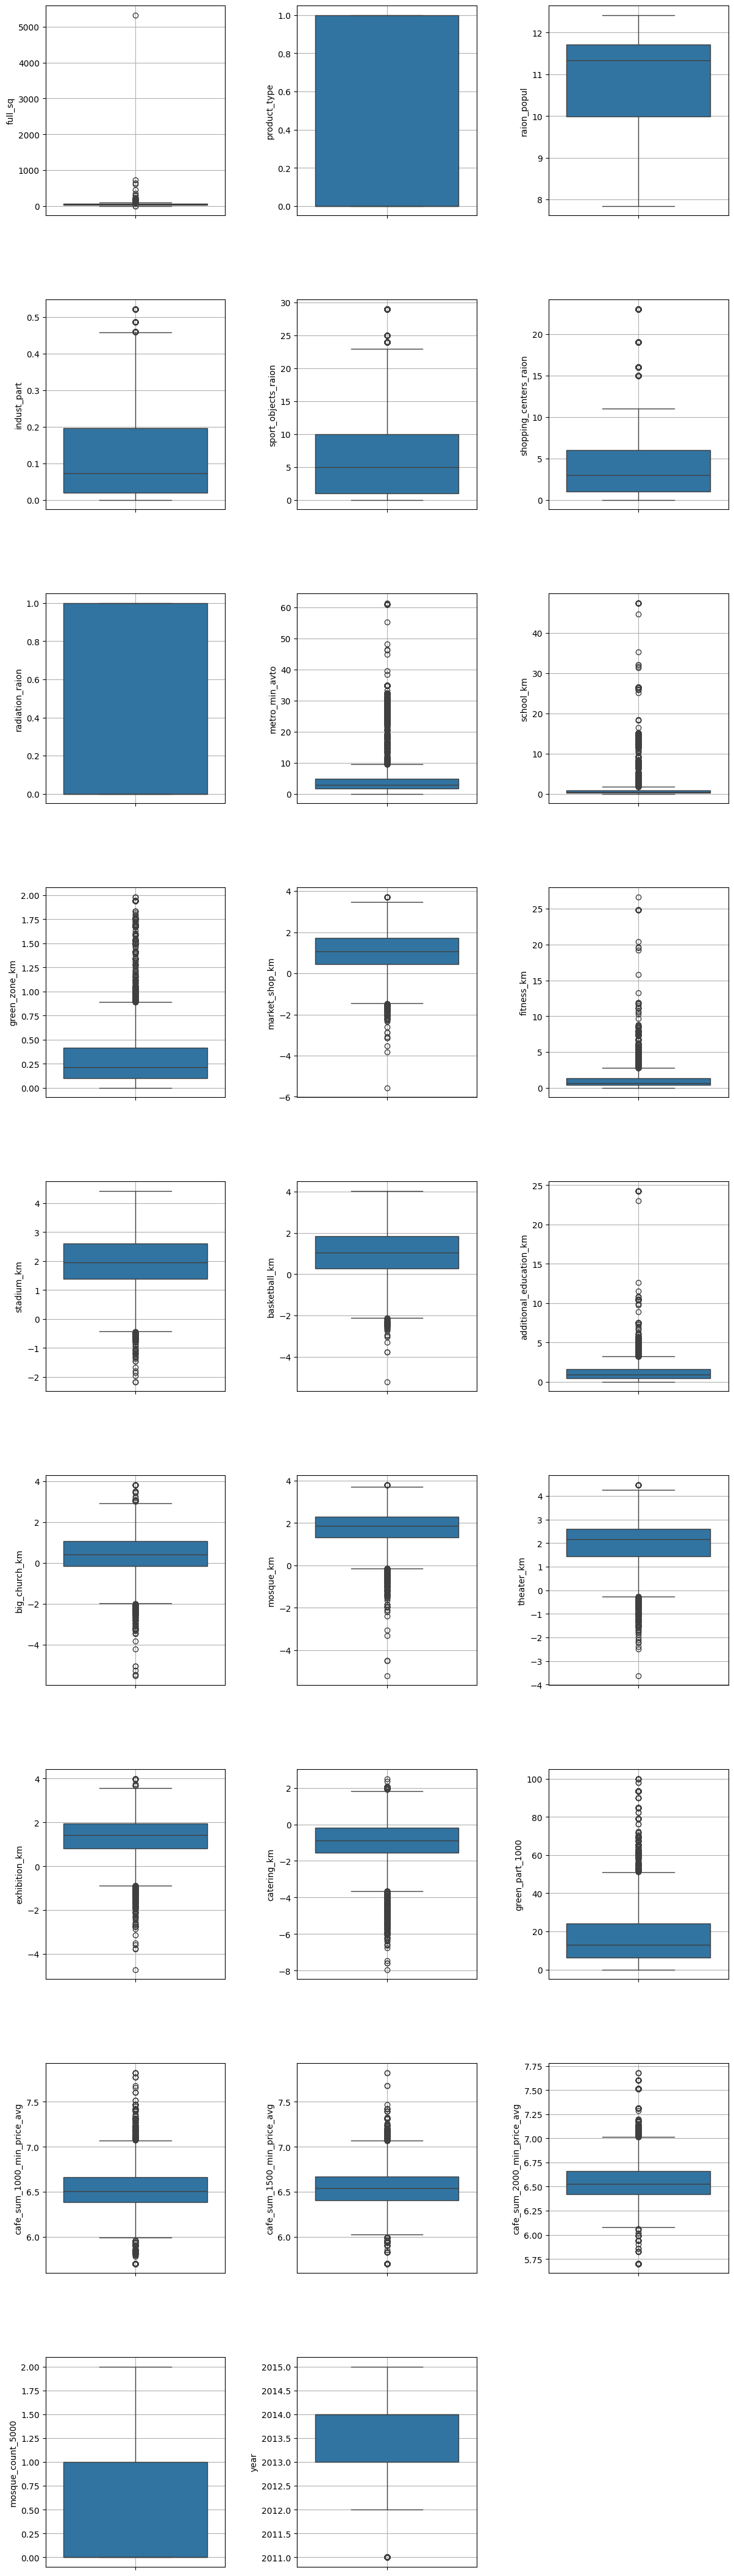

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(9,3,index+1)
    sns.boxplot(y=col, data=test_data)
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
test_data[['full_sq','indust_part','sport_objects_raion','shopping_centers_raion']].describe()

full_sq   indust_part
count  21329.000000  21329.000000
mean      54.088799      0.119305
std       42.559522      0.119186
min        0.000000      0.000000
25%       38.000000      0.019509
50%       49.000000      0.072158
75%       63.000000      0.195781
max     5326.000000      0.521867

In [ ]:
###

###magic

In [ ]:
test_data.loc[test_data['big_church_km']<0, 'big_church_km']=test_data['big_church_km'].abs()
test_data.loc[test_data['mosque_km']<0, 'mosque_km']=test_data['mosque_km'].abs()
test_data.loc[test_data['theater_km']<0, 'theater_km']=test_data['theater_km'].abs()
test_data.loc[test_data['exhibition_km']<0, 'exhibition_km']=test_data['exhibition_km'].abs()
test_data.loc[test_data['catering_km']<0, 'catering_km']=test_data['catering_km'].abs()
test_data.loc[test_data['stadium_km']<0, 'stadium_km']=test_data['stadium_km'].abs()
test_data.loc[test_data['basketball_km']<0, 'basketball_km']=test_data['basketball_km'].abs()
test_data.loc[test_data['additional_education_km']<0, 'additional_education_km']=test_data['additional_education_km'].abs()

In [ ]:
test_data.loc[test_data['big_church_km']<0, 'big_church_km']=test_data['big_church_km'].median()
test_data.loc[test_data['mosque_km']<0, 'mosque_km']=test_data['mosque_km'].median()
test_data.loc[test_data['theater_km']<0, 'theater_km']=test_data['theater_km'].median()
test_data.loc[test_data['exhibition_km']<0, 'exhibition_km']=test_data['exhibition_km'].median()
test_data.loc[test_data['catering_km']<0, 'catering_km']=test_data['catering_km'].median()
test_data.loc[test_data['stadium_km']<0, 'stadium_km']=test_data['stadium_km'].median()
test_data.loc[test_data['basketball_km']<0, 'basketball_km']=test_data['basketball_km'].median()
test_data.loc[test_data['additional_education_km']<0, 'additional_education_km']=test_data['additional_education_km'].median()

array([[<Axes: title={'center': 'big_church_km'}>,
        <Axes: title={'center': 'mosque_km'}>,
        <Axes: title={'center': 'theater_km'}>],
       [<Axes: title={'center': 'exhibition_km'}>,
        <Axes: title={'center': 'catering_km'}>,
        <Axes: title={'center': 'stadium_km'}>],
       [<Axes: title={'center': 'basketball_km'}>,
        <Axes: title={'center': 'additional_education_km'}>, <Axes: >]],
      dtype=object)

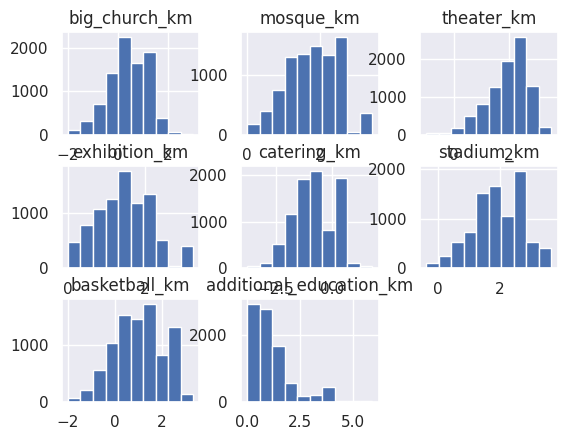

In [ ]:
test_data[['big_church_km','mosque_km','theater_km','exhibition_km','catering_km','stadium_km','basketball_km','additional_education_km']].hist()

array([[<Axes: title={'center': 'big_church_km'}>,
        <Axes: title={'center': 'mosque_km'}>,
        <Axes: title={'center': 'theater_km'}>],
       [<Axes: title={'center': 'exhibition_km'}>,
        <Axes: title={'center': 'catering_km'}>,
        <Axes: title={'center': 'stadium_km'}>],
       [<Axes: title={'center': 'basketball_km'}>,
        <Axes: title={'center': 'additional_education_km'}>, <Axes: >]],
      dtype=object)

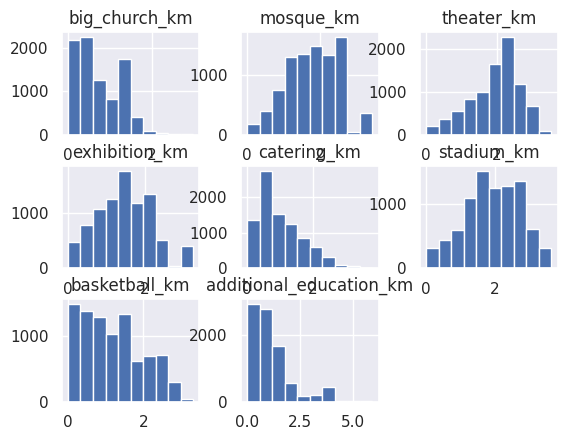

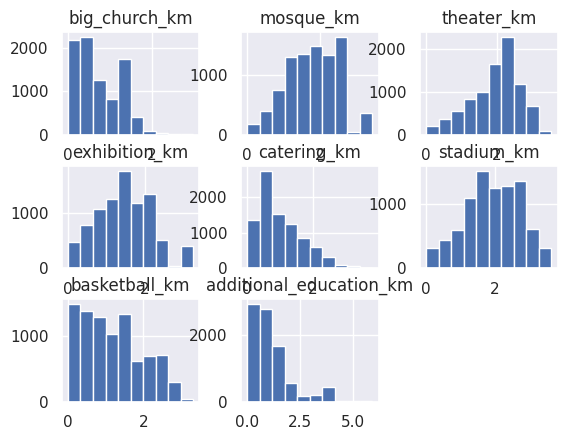

In [ ]:
test_data[['big_church_km','mosque_km','theater_km','exhibition_km','catering_km','stadium_km','basketball_km','additional_education_km']].hist()
test_data[['big_church_km','mosque_km','theater_km','exhibition_km','catering_km','stadium_km','basketball_km','additional_education_km']].hist()
# test_data[['big_church_km','mosque_km','theater_km','exhibition_km','','','','','','']].describe()

In [ ]:
# print(len(test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]))
# test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
print("full_sq -- ",len(test_data[(test_data['full_sq'] > 20) & (test_data['full_sq'] < 100)])/213.29, len(test_data[~((test_data['full_sq'] > 0) & (test_data['full_sq'] < 100))])/213.29)
print("indust_part -- ",len(test_data[test_data['indust_part'] < .4])/213.29, len(test_data[~(test_data['indust_part'] < .4)])/213.29)


print("full_sq -q- ",len(test_data[(test_data['full_sq'] > np.quantile(test_data.full_sq, q = 0.025)) & (test_data['full_sq'] < np.quantile(test_data.full_sq, q = 0.975))])/213.29, len(test_data[~((test_data['full_sq'] > 0) & (test_data['full_sq'] < 100))])/213.29)
print("indust_part -q- ",len(test_data[test_data['indust_part'] < np.quantile(test_data.indust_part, q = 0.975)])/213.29, len(test_data[~(test_data['indust_part'] < np.quantile(test_data.indust_part, q = 0.975))])/213.29)


print("sport_objects_raion -- ",len(test_data[test_data['sport_objects_raion'] < 24])/213.29, len(test_data[~(test_data['sport_objects_raion'] < 24)])/213.29)
print("shopping_centers_raion -- ",len(test_data[test_data['shopping_centers_raion'] < 12])/213.29, len(test_data[~(test_data['shopping_centers_raion'] < 12)])/213.29)
print("big_church_km -- ",len(test_data[(test_data['big_church_km'] > -2)&(test_data['big_church_km'] < 3)])/213.29, len(test_data[~((test_data['big_church_km'] > -2)&(test_data['big_church_km'] < 3))])/213.29)
print("mosque_km -- ",len(test_data[(test_data['mosque_km'] > 0)&(test_data['mosque_km'] < 3.8)])/213.29, len(test_data[~((test_data['mosque_km'] > 0)&(test_data['mosque_km'] < 3.8))])/213.29)
print("theater_km -- ",len(test_data[(test_data['theater_km'] >= -1)&(test_data['theater_km'] < 3.8)])/213.29, len(test_data[~((test_data['theater_km'] >= 0)&(test_data['theater_km'] < 3.8))])/213.29)
print("exhibition_km -- ",len(test_data[(test_data['exhibition_km'] >= 0)&(test_data['exhibition_km'] < 3.8)])/213.29, len(test_data[~((test_data['exhibition_km'] >= 0)&(test_data['exhibition_km'] < 3.8))])/213.29)
print("catering_km -- ",len(test_data[(test_data['catering_km'] >= -3.8)&(test_data['catering_km'] < 1.9)])/213.29, len(test_data[~((test_data['catering_km'] >= -3.8)&(test_data['catering_km'] < 1.9))])/213.29)


print("metro_min_avto -- ",len(test_data[test_data['metro_min_avto'] < 5])/213.29, len(test_data[~(test_data['metro_min_avto'] < 5)])/213.29)
print("school_km -- ",len(test_data[test_data['school_km'] < .71])/213.29, len(test_data[~(test_data['school_km'] < .71)])/213.29)
print("green_zone_km -- ",len(test_data[test_data['green_zone_km'] < .5])/213.29, len(test_data[~(test_data['green_zone_km'] < .5)])/213.29)
print("market_shop_km -- ",len(test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)])/213.29, len(test_data[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1))])/213.29)
print("fitness_km -- ",len(test_data[test_data['fitness_km'] < .5])/213.29, len(test_data[~(test_data['fitness_km'] < .5)])/213.29)

print("stadium_km -- ",len(test_data[test_data['stadium_km']>-0.4])/213.29, len(test_data[~(test_data['stadium_km']>-0.4)])/213.29)
print("basketball_km -- ",len(test_data[test_data['basketball_km']>-2])/213.29, len(test_data[~(test_data['basketball_km']>-2)])/213.29)

print("additional_education_km -- ",len(test_data[test_data['additional_education_km'] < .5])/213.29, len(test_data[~(test_data['additional_education_km'] < .5)])/213.29)
print("green_part_1000 -- ",len(test_data[test_data['green_part_1000'] < 33])/213.29, len(test_data[~(test_data['green_part_1000'] < 33)])/213.29)
print("cafe_sum_1000_min_price_avg -- ",len(test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6))])/213.29)
print("cafe_sum_1500_min_price_avg -- ",len(test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6))])/213.29)
print("cafe_sum_2000_min_price_avg -- ",len(test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6))])/213.29)


print("year -- ",len(test_data[(test_data['year'] >=2012)&(test_data['year'] < 2024)])/213.29, len(test_data[~((test_data['year'] >=2012)&(test_data['year'] < 2024))])/213.29)
print("price_doc -- ",len(test_data[test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975)])/213.29, len(test_data[~(test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975))])/213.29)



# 'stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000','year'
# test_data = test_data[test_data['school_km'] < .71]
# test_data = test_data[test_data['green_zone_km'] < .5]
# test_data = test_data[test_data['cemetery_km'] < 5]
# # test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
# test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
# test_data = test_data[test_data['fitness_km'] < .5]
# test_data = test_data[test_data['additional_education_km'] < .5]
# test_data = test_data[test_data['big_church_km'].abs() < 2.5]
# test_data = test_data[test_data['green_part_1000'] < 33]
# test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
# test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
# test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

full_sq --  96.72277181302452 3.2772281869754796
indust_part --  96.25861503117821 3.741384968821792
full_sq -q-  93.70340850485255 3.2772281869754796
indust_part -q-  97.0697172863238 2.9302827136762155
sport_objects_raion --  96.35238407801585 3.647615921984153
shopping_centers_raion --  94.76768718645975 5.232312813540251
big_church_km --  98.60752965446106 1.3924703455389376
mosque_km --  98.03553846875147 1.964461531248535
theater_km --  99.52177786112804 2.1801303389751046
exhibition_km --  92.87824089268133 7.121759107318675
catering_km --  98.28402644287121 1.715973557128792
metro_min_avto --  75.45595199024802 24.544048009751982
school_km --  68.02006657602325 31.979933423976746
green_zone_km --  82.45112288433589 17.54887711566412
market_shop_km --  96.06170003281918 3.938299967180834
fitness_km --  37.52168409208121 62.4783159079188
stadium_km --  99.34830512447841 0.6516948755215903
basketball_km --  99.63430071733322 0.3656992826667917
additional_education_km --  26.442871

In [ ]:
test_data.price_doc.describe().apply(lambda x: format(x, 'f'))

count       21329.000000
mean      7117599.307516
std       4706342.297460
min        100000.000000
25%       4745995.000000
50%       6255454.000000
75%       8300000.000000
max      80777440.000000
Name: price_doc, dtype: object

##🛠️ Предобработка данных 3.0

Результаты прогона в Linear Regression

* Средняя абсолютная ошибка (MAE): 1359457.14
* Среднеквадратичная ошибка (MSE): 4342390364271.23
* Корень из среднеквадратичной ошибки (RMSE): 2083840.29
* Коэффициент детерминации (R^2): 0.44


In [ ]:
df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/train.csv', index_col=0)
df.head(5)

full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0       43   24.0      2014.0       1.0      10.0    1.0             1   
1       66    3.0      1979.0       3.0      10.0    3.0             0   
2       55    5.0      1979.0       2.0       6.0    2.0             0   
3       45    7.0      1970.0       2.0       6.0    2.0             0   
4       43    4.0      1968.0       2.0       6.0    2.0             0   

   raion_popul  indust_part  sport_objects_raion  ...  \
0     8.294300     0.007122                    0  ...   
1    11.314231     0.232205                    4  ...   
2    11.718817     0.000170                    5  ...   
3    11.331032     0.428826                    4  ...   
4    11.538769     0.136330                    6  ...   

   cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  green_part_2000  \
0                           0                     6.907755         3.710396   
1                           0                     6.626122         2.764431   
2                           0                     6.368753         3.511844   
3                           0                     6.753601         1.814825   
4                           0                     6.636603         2.257588   

   cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
0                     6.725430                  0        1.803359   
1                     6.479615                  1        2.631169   
2                     6.192138                  0        1.363537   
3                     6.551080                  0        2.732418   
4                     6.646507                  1        2.020222   

   cafe_sum_5000_min_price_avg  mosque_count_5000  year  price_doc  
0                     6.616560                  0  2014    5533460  
1                     6.469948                  1  2013    9900000  
2                     6.462171                  0  2012    1990000  
3                     6.458229                  0  2014    6500000  
4                     6.634778                  2  2014    8500000  

[5 rows x 51 columns]

In [ ]:
test_df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/starting_k/test.csv', index_col=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   full_sq                       9142 non-null   int64  
 1   floor                         9142 non-null   float64
 2   build_year                    9142 non-null   int64  
 3   num_room                      9142 non-null   int64  
 4   kitch_sq                      9142 non-null   int64  
 5   state                         9142 non-null   int64  
 6   product_type                  9142 non-null   int64  
 7   raion_popul                   9142 non-null   float64
 8   indust_part                   9142 non-null   float64
 9   sport_objects_raion           9142 non-null   int64  
 10  shopping_centers_raion        9142 non-null   int64  
 11  radiation_raion               9142 non-null   int64  
 12  build_count_block             9142 non-null   int64  
 13  build_co

In [ ]:
# test_slice = test_df[['full_sq','product_type','raion_popul','indust_part','sport_objects_raion','shopping_centers_raion','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','big_church_km','mosque_km','theater_km','exhibition_km','catering_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year' ]]
# test_slice.info()


# test_slice = test_df[['full_sq','product_type','raion_popul','indust_part','sport_objects_raion','shopping_centers_raion','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','big_church_km','mosque_km','theater_km','exhibition_km','catering_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year']]
# test_slice.info()


test_slice = test_df[['full_sq', 'state', 'product_type', 'raion_popul', 'indust_part', 'sport_objects_raion', 'shopping_centers_raion', 'radiation_raion','metro_min_avto','school_km', 'build_count_block', 'build_count_brick', 'build_count_monolith', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'ID_railroad_station_avto', 'mkad_km', 'ttk_km', 'oil_chemistry_km', 'nuclear_reactor_km', 'power_transmission_line_km', 'market_shop_km', 'fitness_km', 'stadium_km', 'basketball_km',  'additional_education_km', 'big_church_km', 'mosque_km', 'theater_km', 'exhibition_km', 'catering_km', 'green_part_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg', 'green_part_2000', 'cafe_sum_2000_min_price_avg', 'prom_part_5000', 'cafe_sum_5000_min_price_avg', 'mosque_count_5000', 'year']]
test_slice.info()

# test_slice = test_df[['full_sq','product_type','indust_part','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year' ]]
# test_slice.info()



# test_slice = test_df[['full_sq', 'kitch_sq','product_type','raion_popul','indust_part','sport_objects_raion','shopping_centers_raion','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# # test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# # test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   state                        9142 non-null   int64  
 2   product_type                 9142 non-null   int64  
 3   raion_popul                  9142 non-null   float64
 4   indust_part                  9142 non-null   float64
 5   sport_objects_raion          9142 non-null   int64  
 6   shopping_centers_raion       9142 non-null   int64  
 7   radiation_raion              9142 non-null   int64  
 8   metro_min_avto               9142 non-null   float64
 9   school_km                    9142 non-null   float64
 10  build_count_block            9142 non-null   int64  
 11  build_count_brick            9142 non-null   int64  
 12  build_count_monolith         9142 non-null   int64  
 13  green_zone_km          

In [ ]:
print("full_sq -- ",len(test_slice[(test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100)])/91.42, len(test_slice[~((test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100))])/91.42)
print("indust_part -- ",len(test_slice[test_slice['indust_part'] < .4])/91.42, len(test_slice[~(test_slice['indust_part'] < .4)])/91.42)


print("sport_objects_raion -- ",len(test_slice[test_slice['sport_objects_raion'] < 24])/91.42, len(test_slice[~(test_slice['sport_objects_raion'] < 24)])/91.42)
print("shopping_centers_raion -- ",len(test_slice[test_slice['shopping_centers_raion'] < 12])/91.42, len(test_slice[~(test_slice['shopping_centers_raion'] < 12)])/91.42)
print("big_church_km -- ",len(test_slice[(test_slice['big_church_km'] > -2)&(test_slice['big_church_km'] < 3)])/91.42, len(test_slice[~((test_slice['big_church_km'] > -2)&(test_slice['big_church_km'] < 3))])/91.42)
print("mosque_km -- ",len(test_slice[(test_slice['mosque_km'] > 0)&(test_slice['mosque_km'] < 3.8)])/91.42, len(test_slice[~((test_slice['mosque_km'] > 0)&(test_slice['mosque_km'] < 3.8))])/91.42)
print("theater_km -- ",len(test_slice[(test_slice['theater_km'] >= -1)&(test_slice['theater_km'] < 3.8)])/91.42, len(test_slice[~((test_slice['theater_km'] >= 0)&(test_slice['theater_km'] < 3.8))])/91.42)
print("exhibition_km -- ",len(test_slice[(test_slice['exhibition_km'] >= 0)&(test_slice['exhibition_km'] < 3.8)])/91.42, len(test_slice[~((test_slice['exhibition_km'] >= 0)&(test_slice['exhibition_km'] < 3.8))])/91.42)
print("catering_km -- ",len(test_slice[(test_slice['catering_km'] >= -3.8)&(test_slice['catering_km'] < 1.9)])/91.42, len(test_slice[~((test_slice['catering_km'] >= -3.8)&(test_slice['catering_km'] < 1.9))])/91.42)


print("metro_min_avto -- ",len(test_slice[test_slice['metro_min_avto'] < 5])/91.42, len(test_slice[~(test_slice['metro_min_avto'] < 5)])/91.42)
print("school_km -- ",len(test_slice[test_slice['school_km'] < .71])/91.42, len(test_slice[~(test_slice['school_km'] < .71)])/91.42)
print("green_zone_km -- ",len(test_slice[test_slice['green_zone_km'] < .5])/91.42, len(test_slice[~(test_slice['green_zone_km'] < .5)])/91.42)
print("market_shop_km -- ",len(test_slice[(test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)])/91.42, len(test_slice[~((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1))])/91.42)
print("fitness_km -- ",len(test_slice[test_slice['fitness_km'] < .5])/91.42, len(test_slice[~(test_slice['fitness_km'] < .5)])/91.42)

print("stadium_km -- ",len(test_slice[test_slice['stadium_km']>-0.4])/91.42, len(test_slice[~(test_slice['stadium_km']>-0.4)])/91.42)
print("basketball_km -- ",len(test_slice[test_slice['basketball_km']>-2])/91.42, len(test_slice[~(test_slice['basketball_km']>-2)])/91.42)

print("additional_education_km -- ",len(test_slice[test_slice['additional_education_km'] < .5])/91.42, len(test_slice[~(test_slice['additional_education_km'] < .5)])/91.42)
print("green_part_1000 -- ",len(test_slice[test_slice['green_part_1000'] < 33])/91.42, len(test_slice[~(test_slice['green_part_1000'] < 33)])/91.42)
print("cafe_sum_1000_min_price_avg -- ",len(test_slice[(test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)])/91.42, len(test_slice[~((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6))])/91.42)
print("cafe_sum_1500_min_price_avg -- ",len(test_slice[(test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)])/91.42, len(test_slice[~((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6))])/91.42)
print("cafe_sum_2000_min_price_avg -- ",len(test_slice[(test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)])/91.42, len(test_slice[~((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6))])/91.42)


print("year -- ",len(test_slice[(test_slice['year'] >=2012)&(test_slice['year'] < 2024)])/91.42, len(test_slice[~((test_slice['year'] >=2012)&(test_slice['year'] < 2024))])/91.42)
# print("price_doc -- ",len(test_slice[test_slice['price_doc'] < np.quantile(test_slice.price_doc, q = 0.975)])/91.42, len(test_slice[~(test_slice['price_doc'] < np.quantile(test_slice.price_doc, q = 0.975))])/91.42)



full_sq --  96.45591774228834 3.5440822577116604
indust_part --  96.4996718442354 3.5003281557646027
sport_objects_raion --  96.05119229927806 3.9488077007219426
shopping_centers_raion --  94.82607744476044 5.173922555239554
big_church_km --  98.4357908553927 1.564209144607307
mosque_km --  97.86698753008095 2.1330124699190547
theater_km --  99.52964340406913 2.1986436228396413
exhibition_km --  93.03215926493108 6.967840735068912
catering_km --  98.34828265149858 1.651717348501422
metro_min_avto --  75.47582585867426 24.524174141325748
school_km --  67.85167359439947 32.14832640560052
green_zone_km --  83.18748632684314 16.812513673156857
market_shop_km --  96.44497921680157 3.5550207831984246
fitness_km --  37.50820389411507 62.49179610588492
stadium_km --  99.3874425727412 0.6125574272588055
basketball_km --  99.57339750601619 0.42660249398381095
additional_education_km --  26.14307591336688 73.85692408663311
green_part_1000 --  87.65040472544301 12.34959527455699
cafe_sum_1000_min_

In [ ]:
test_slice.loc[~((test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100)),'full_sq'] = test_slice.loc[(test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100),'full_sq'].median()
test_slice.loc[~(test_slice['indust_part'] < .4),'indust_part'] = test_slice.loc[test_slice['indust_part'] < .4,'indust_part'].median()
test_slice.loc[~(test_slice['green_zone_km'] < .5),'green_zone_km'] = test_slice.loc[test_slice['green_zone_km'] < .5,'green_zone_km'].median()
test_slice.loc[~((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)),'market_shop_km'] = test_slice.loc[(test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1),'market_shop_km'].median()


test_slice.loc[~(test_slice['sport_objects_raion'] < 24),'sport_objects_raion'] = test_slice.loc[test_slice['sport_objects_raion'] < 24,'sport_objects_raion'].median()
test_slice.loc[~(test_slice['shopping_centers_raion'] < 12),'shopping_centers_raion'] = test_slice.loc[test_slice['shopping_centers_raion'] < 12,'shopping_centers_raion'].median()
test_slice.loc[~((test_slice['big_church_km'] > -2)&(test_slice['big_church_km'] < 3)),'big_church_km'] = test_slice.loc[(test_slice['big_church_km'] > -2)&(test_slice['big_church_km'] < 3),'big_church_km'].median()
test_slice.loc[~((test_slice['mosque_km'] > 0)&(test_slice['mosque_km'] < 3.8)),'mosque_km'] = test_slice.loc[(test_slice['mosque_km'] > 0)&(test_slice['mosque_km'] < 3.8),'mosque_km'].median()
test_slice.loc[~((test_slice['theater_km'] >= -1)&(test_slice['theater_km'] < 3.8)),'theater_km'] = test_slice.loc[(test_slice['theater_km'] >= -1)&(test_slice['theater_km'] < 3.8),'theater_km'].median()
test_slice.loc[~((test_slice['exhibition_km'] >= 0)&(test_slice['exhibition_km'] < 3.8)),'exhibition_km'] = test_slice.loc[(test_slice['exhibition_km'] >= 0)&(test_slice['exhibition_km'] < 3.8),'exhibition_km'].median()
test_slice.loc[~((test_slice['catering_km'] >= -3.8)&(test_slice['catering_km'] < 1.9)),'catering_km'] = test_slice.loc[(test_slice['catering_km'] >= -3.8)&(test_slice['catering_km'] < 1.9),'catering_km'].median()


test_slice.loc[~(test_slice['stadium_km']>-0.4),'stadium_km'] = test_slice.loc[test_slice['stadium_km']>-0.4,'stadium_km'].median()
test_slice.loc[~(test_slice['basketball_km']>-2),'basketball_km'] = test_slice.loc[test_slice['basketball_km']>-2,'basketball_km'].median()
test_slice.loc[~(test_slice['green_part_1000'] < 33),'green_part_1000'] = test_slice.loc[test_slice['green_part_1000'] < 33,'green_part_1000'].median()

test_slice.loc[~((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_slice.loc[(test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6),'cafe_sum_1000_min_price_avg'].median()
test_slice.loc[~((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_slice.loc[(test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6),'cafe_sum_1500_min_price_avg'].median()
test_slice.loc[~((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_slice.loc[(test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6),'cafe_sum_2000_min_price_avg'].median()

test_slice.loc[~((test_slice['year'] >=2012)&(test_slice['year'] < 2024)),'year'] = test_slice.loc[(test_slice['year'] >=2012)&(test_slice['year'] < 2024),'year'].median()

# Приравнивание >80% выбрасов данных к медиане

test_slice.loc[~(test_slice['metro_min_avto'] < 5),'metro_min_avto'] = test_slice.loc[(test_slice['metro_min_avto'] < 5),'metro_min_avto'].median()
test_slice.loc[~(test_slice['school_km'] < .71),'school_km'] = test_slice.loc[(test_slice['school_km'] < .71),'school_km'].median()
test_slice.loc[~(test_slice['fitness_km'] < .5),'fitness_km'] = test_slice.loc[(test_slice['fitness_km'] < .5),'fitness_km'].median()
test_slice.loc[~(test_slice['additional_education_km'] < .5),'additional_education_km'] = test_slice.loc[(test_slice['additional_education_km'] < .5),'additional_education_km'].median()


### Обработка тренировочных данных

In [ ]:
test_data = df[['full_sq', 'state', 'product_type', 'raion_popul', 'indust_part', 'sport_objects_raion', 'shopping_centers_raion', 'radiation_raion', 'metro_min_avto', 'school_km', 'build_count_block', 'build_count_brick', 'build_count_monolith', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'ID_railroad_station_avto', 'mkad_km', 'ttk_km', 'oil_chemistry_km', 'nuclear_reactor_km', 'power_transmission_line_km', 'market_shop_km', 'fitness_km', 'stadium_km', 'basketball_km',  'additional_education_km', 'big_church_km', 'mosque_km', 'theater_km', 'exhibition_km', 'catering_km', 'green_part_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg', 'green_part_2000', 'cafe_sum_2000_min_price_avg', 'prom_part_5000', 'cafe_sum_5000_min_price_avg', 'mosque_count_5000', 'year', 'price_doc']]
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   state                        21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   raion_popul                  21329 non-null  float64
 4   indust_part                  21329 non-null  float64
 5   sport_objects_raion          21329 non-null  int64  
 6   shopping_centers_raion       21329 non-null  int64  
 7   radiation_raion              21329 non-null  int64  
 8   metro_min_avto               21329 non-null  float64
 9   school_km                    21329 non-null  float64
 10  build_count_block            21329 non-null  float64
 11  build_count_brick            21329 non-null  float64
 12  build_count_monolith         21329 non-null  float64
 13  green_zone_km        

In [ ]:
# test_data = df[['full_sq','product_type','indust_part','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year', 'price_doc' ]]
test_data = df[['full_sq','product_type','raion_popul','indust_part','sport_objects_raion','shopping_centers_raion','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','big_church_km','mosque_km','theater_km','exhibition_km','catering_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year','price_doc']]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   product_type                 21329 non-null  int64  
 2   raion_popul                  21329 non-null  float64
 3   indust_part                  21329 non-null  float64
 4   sport_objects_raion          21329 non-null  int64  
 5   shopping_centers_raion       21329 non-null  int64  
 6   radiation_raion              21329 non-null  int64  
 7   metro_min_avto               21329 non-null  float64
 8   school_km                    21329 non-null  float64
 9   green_zone_km                21329 non-null  float64
 10  market_shop_km               21329 non-null  float64
 11  fitness_km                   21329 non-null  float64
 12  stadium_km                   21329 non-null  float64
 13  basketball_km        

### Чистка данных

In [ ]:
# Отбрасывание данных 20% выборки

# test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[test_data['full_sq'] > 0]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['green_zone_km'] < .5]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]


test_data = test_data[test_data['sport_objects_raion'] < 24]
test_data = test_data[test_data['shopping_centers_raion'] < 12]
test_data = test_data[(test_data['big_church_km'] > -2)&(test_data['big_church_km'] < 3)]
test_data = test_data[(test_data['mosque_km'] > 0)&(test_data['mosque_km'] < 3.8)]
test_data = test_data[(test_data['theater_km'] >= -1)&(test_data['theater_km'] < 3.8)]
test_data = test_data[(test_data['exhibition_km'] >= 0)&(test_data['exhibition_km'] < 3.8)]
test_data = test_data[(test_data['catering_km'] >= -3.8)&(test_data['catering_km'] < 1.9)]


test_data = test_data[(test_data['mkad_km'] < 4)]

test_data = test_data[test_data['stadium_km']>-0.4]
test_data = test_data[test_data['basketball_km']>-2]
test_data = test_data[test_data['green_part_1000'] < 33]
# test_data = test_data[test_data['green_part_2000'] >= 0]

test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

test_data = test_data[(test_data['year'] >=2012)&(test_data['year'] < 2024)]
test_data = test_data[test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975)]

# Приравнивание >80% выбрасов данных к медиане

# test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].median()
# test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].median()
# test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].median()
# test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].median()


In [ ]:
test_data = test_data[test_data['full_sq'] > 0]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['green_zone_km'] < .5]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]


test_data = test_data[test_data['sport_objects_raion'] < 24]
test_data = test_data[test_data['shopping_centers_raion'] < 12]
test_data = test_data[(test_data['big_church_km'] > -2)&(test_data['big_church_km'] < 3)]
test_data = test_data[(test_data['mosque_km'] > 0)&(test_data['mosque_km'] < 3.8)]
test_data = test_data[(test_data['theater_km'] >= -1)&(test_data['theater_km'] < 3.8)]
test_data = test_data[(test_data['exhibition_km'] >= 0)&(test_data['exhibition_km'] < 3.8)]
test_data = test_data[(test_data['catering_km'] >= -3.8)&(test_data['catering_km'] < 1.9)]


test_data = test_data[(test_data['mkad_km'] < 4)]

test_data = test_data[test_data['stadium_km']>-0.4]
test_data = test_data[test_data['basketball_km']>-2]
test_data = test_data[test_data['green_part_1000'] < 33]
# test_data = test_data[test_data['green_part_2000'] >= 0]

test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

test_data = test_data[(test_data['year'] >=2012)&(test_data['year'] < 2024)]
test_data = test_data[test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975)]

# Приравнивание >80% выбрасов данных к медиане

# test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].median()
# test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].median()
# test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].median()
# test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].median()


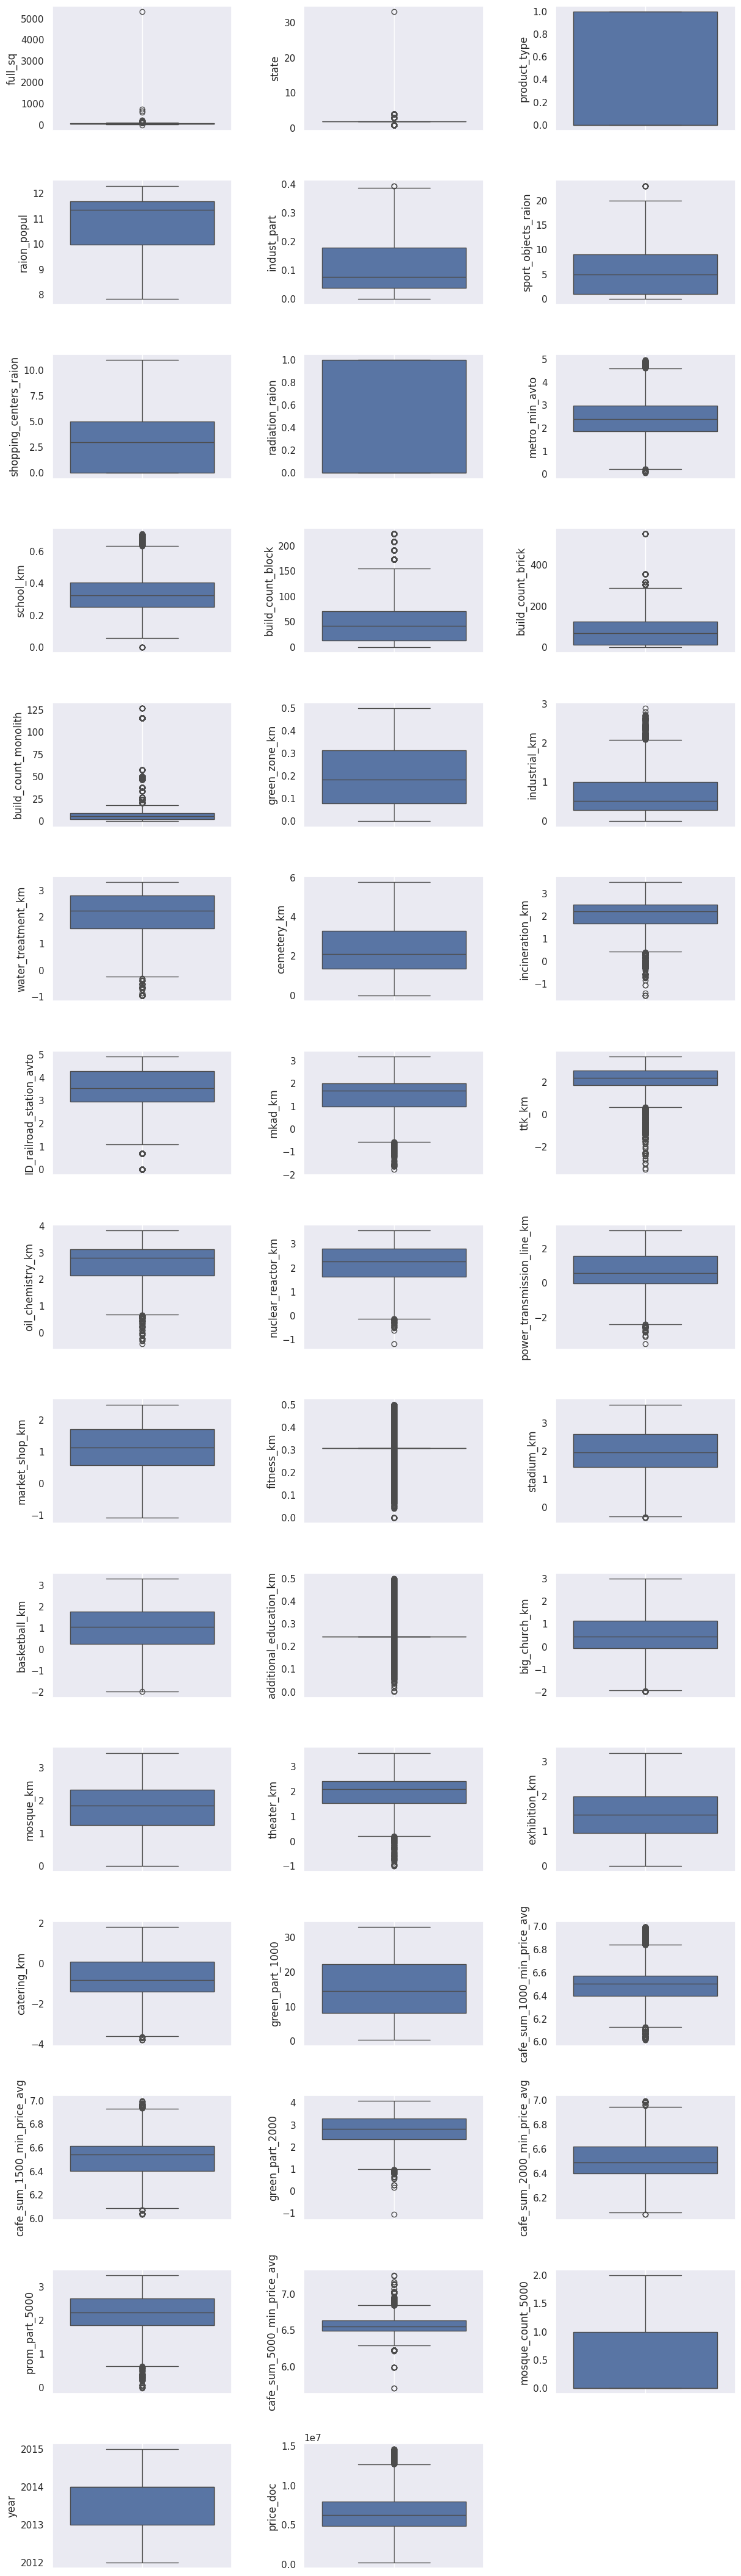

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(15,3,index+1)
    sns.boxplot(y=col, data=test_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 1 to 21328
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      8817 non-null   int64  
 1   state                        8817 non-null   float64
 2   product_type                 8817 non-null   int64  
 3   raion_popul                  8817 non-null   float64
 4   indust_part                  8817 non-null   float64
 5   sport_objects_raion          8817 non-null   int64  
 6   shopping_centers_raion       8817 non-null   int64  
 7   radiation_raion              8817 non-null   int64  
 8   metro_min_avto               8817 non-null   float64
 9   school_km                    8817 non-null   float64
 10  build_count_block            8817 non-null   float64
 11  build_count_brick            8817 non-null   float64
 12  build_count_monolith         8817 non-null   float64
 13  green_zone_km         

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                     1.000000
sport_objects_raion           0.275709
raion_popul                   0.265776
shopping_centers_raion        0.244993
catering_km                   0.191351
water_treatment_km            0.170071
year                          0.165401
full_sq                       0.150149
build_count_monolith          0.147552
cafe_sum_5000_min_price_avg   0.147364
build_count_brick             0.136847
mosque_count_5000             0.134439
radiation_raion               0.131577
prom_part_5000                0.127526
cafe_sum_2000_min_price_avg   0.115942
industrial_km                 0.113564
state                         0.101378
cafe_sum_1000_min_price_avg   0.095777
cafe_sum_1500_min_price_avg   0.063269
build_count_block             0.053127
green_zone_km                 0.029579
incineration_km              -0.003326
cemetery_km                  -0.028435
oil_chemistry_km             -0.031276
green_part_2000              -0.039501
indust_part                  -0.044569
mkad_km                      -0.065803
green_part_1000              -0.078708
ID_railroad_station_avto     -0.093289
additional_education_km      -0.129168
product_type                 -0.144832
mosque_km                    -0.145857
power_transmission_line_km   -0.166534
school_km                    -0.181506
metro_min_avto               -0.181865
market_shop_km               -0.183613
theater_km                   -0.190480
exhibition_km                -0.219751
big_church_km                -0.235182
stadium_km                   -0.239900
fitness_km                   -0.240790
basketball_km                -0.248050
ttk_km                       -0.256060
nuclear_reactor_km           -0.260918

<Axes: >

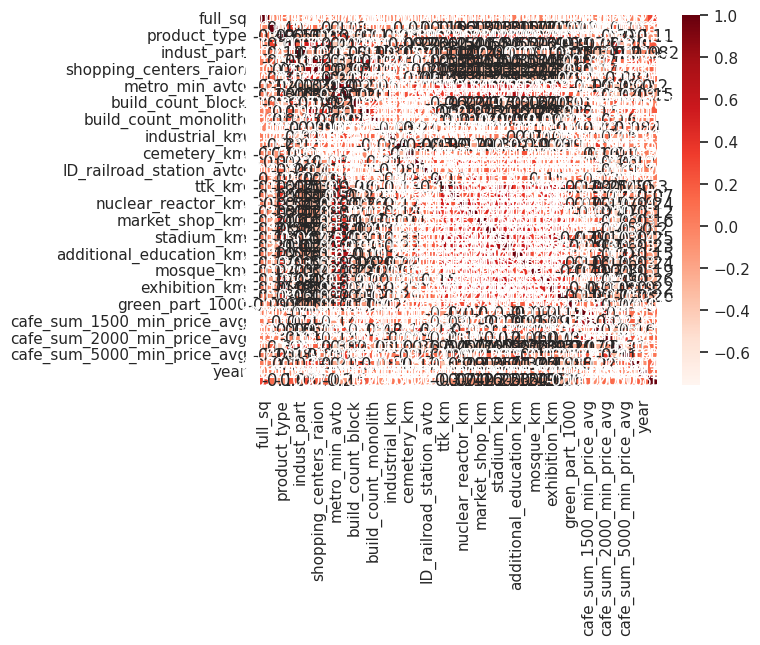

In [ ]:
sns.heatmap(test_data.corr(), annot=True,cmap='Reds')

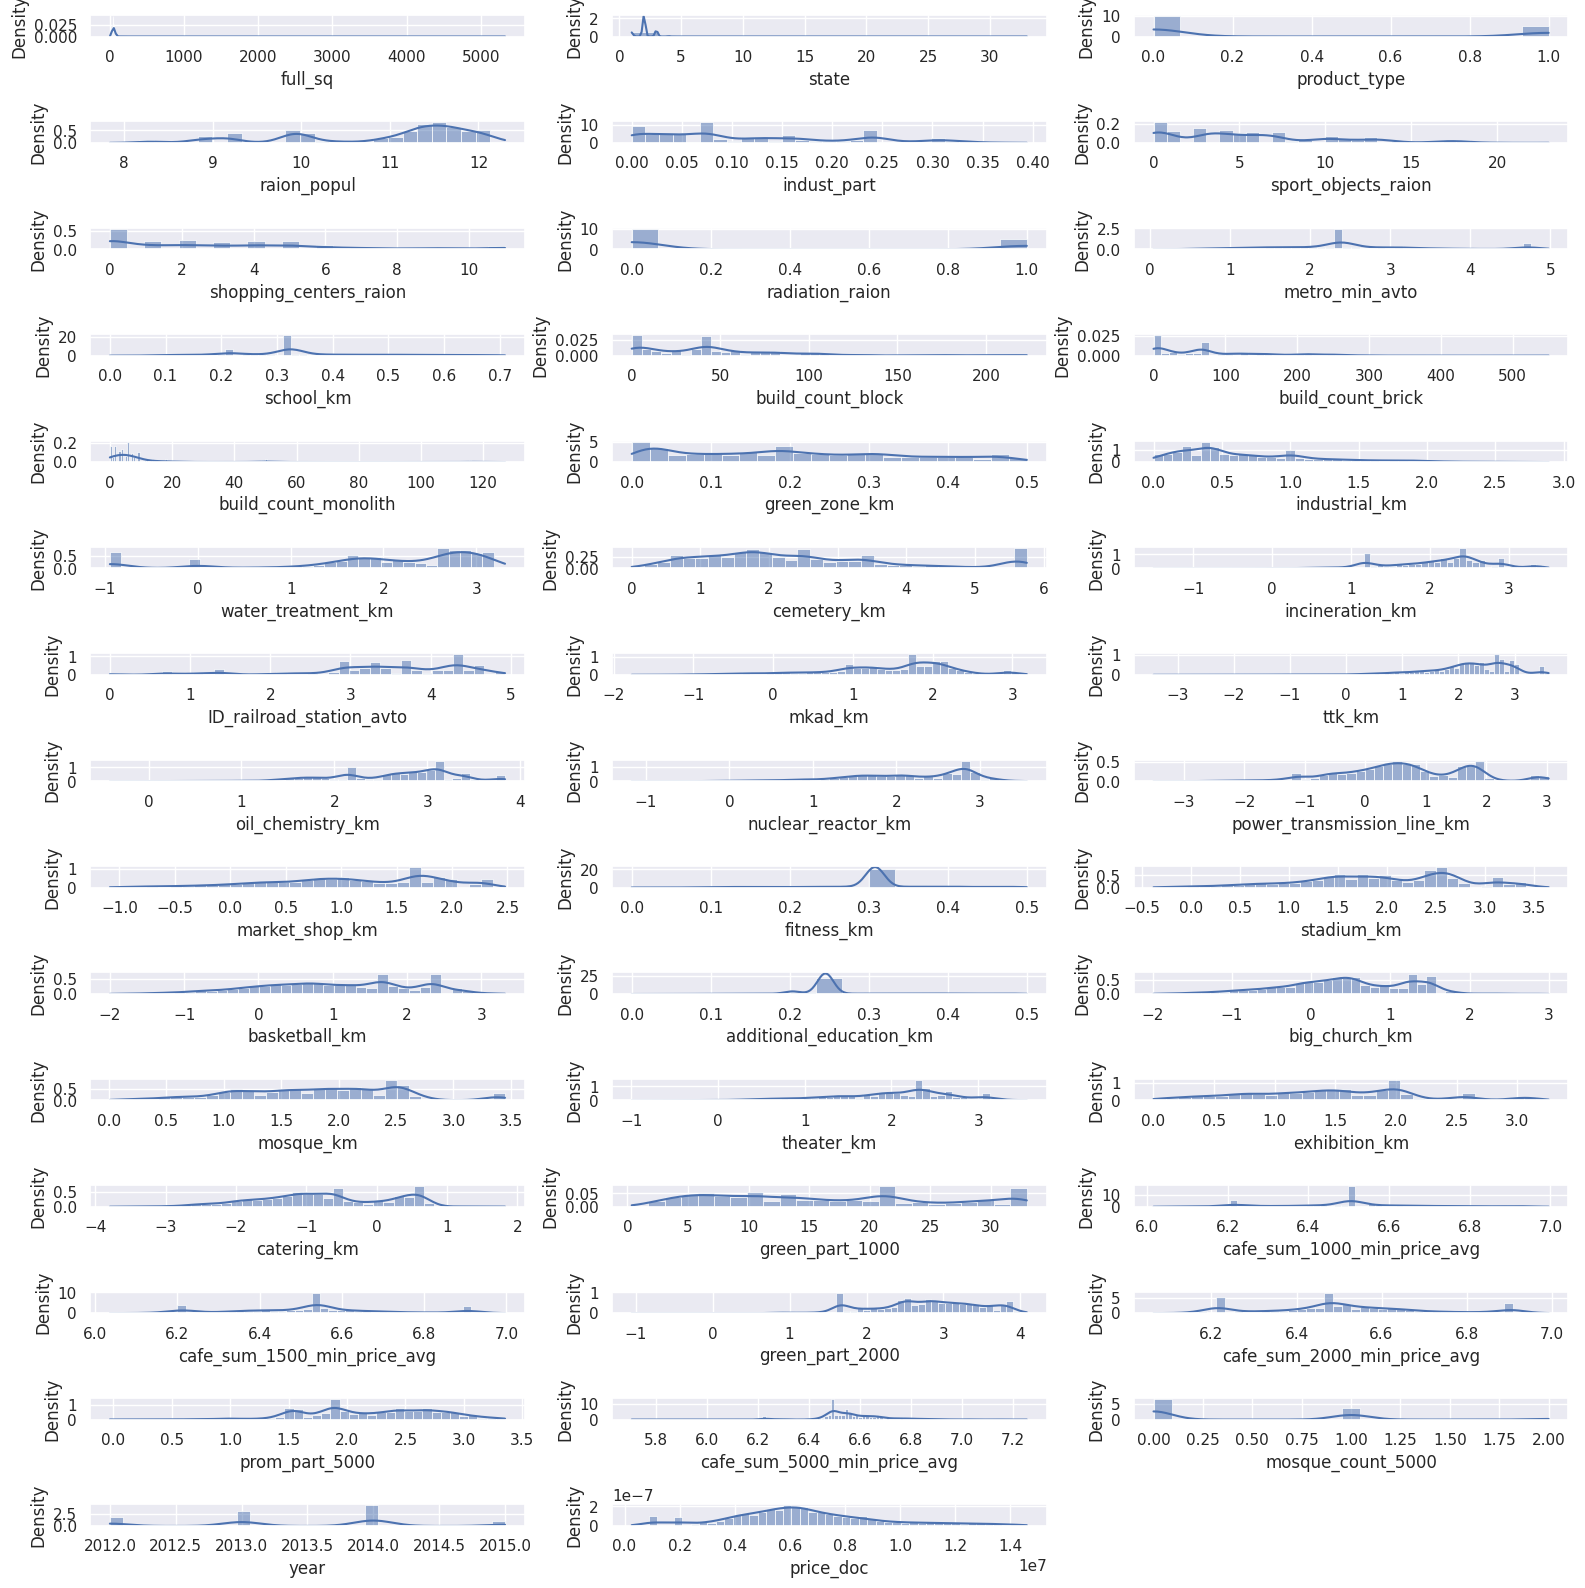

In [ ]:

fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(15,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0)


In [ ]:
#после объединения хуже скор! на 10 000
test_data['cafe_sum_price_avg'] = (test_data['cafe_sum_1000_min_price_avg'] + test_data['cafe_sum_1500_min_price_avg'] + test_data['cafe_sum_2000_min_price_avg'])/3.0


test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10932 entries, 1 to 21328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  10932 non-null  int64  
 1   product_type             10932 non-null  int64  
 2   indust_part              10932 non-null  float64
 3   radiation_raion          10932 non-null  int64  
 4   metro_min_avto           10932 non-null  float64
 5   school_km                10932 non-null  float64
 6   green_zone_km            10932 non-null  float64
 7   market_shop_km           10932 non-null  float64
 8   fitness_km               10932 non-null  float64
 9   stadium_km               10932 non-null  float64
 10  basketball_km            10932 non-null  float64
 11  additional_education_km  10932 non-null  float64
 12  green_part_1000          10932 non-null  float64
 13  mosque_count_5000        10932 non-null  int64  
 14  year                     10

In [ ]:
# First let's visualize the features against the price

fig, ax = plt.subplots(9, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="full_sq", y="price_doc", ax=ax[0])
ax[0].set_title("price_doc vs. full_sq")

sns.lineplot(data=train_data, x="floor", y="price_doc", ax=ax[1])
ax[1].set_title("price_doc vs. floor")

sns.lineplot(data=train_data, x="build_year", y="price_doc", ax=ax[2])
ax[2].set_title("price_doc vs. build_year")

sns.lineplot(data=train_data, x="num_room", y="price_doc", ax=ax[3])
ax[3].set_title("price_doc vs. num_room")

sns.lineplot(data=train_data, x="kitch_sq", y="price_doc", ax=ax[4])
ax[4].set_title("price_doc vs. kitch_sq")

sns.lineplot(data=train_data, x="state", y="price_doc", ax=ax[5])
ax[5].set_title("price_doc vs. state")

sns.lineplot(data=train_data, x="product_type", y="price_doc", ax=ax[6])
ax[6].set_title("price_doc vs. product_type")

sns.lineplot(data=train_data, x="raion_popul", y="price_doc", ax=ax[7])
ax[7].set_title("price_doc vs. raion_popul")

sns.lineplot(data=train_data, x="indust_part", y="price_doc", ax=ax[8])
ax[8].set_title("price_doc vs. indust_part")

sns.lineplot(data=train_data, x="sport_objects_raion", y="price_doc", ax=ax[9])
ax[9].set_title("price_doc vs. sport_objects_raion")

sns.lineplot(data=train_data, x="shopping_centers_raion", y="price_doc", ax=ax[10])
ax[10].set_title("price_doc vs. shopping_centers_raion")

sns.lineplot(data=train_data, x="radiation_raion", y="price_doc", ax=ax[11])
ax[11].set_title("price_doc vs. radiation_raion")

sns.lineplot(data=train_data, x="build_count_block", y="price_doc", ax=ax[12])
ax[12].set_title("price_doc vs. build_count_block")

sns.lineplot(data=train_data, x="build_count_brick", y="price_doc", ax=ax[13])
ax[13].set_title("price_doc vs. build_count_brick")

sns.lineplot(data=train_data, x="build_count_monolith", y="price_doc", ax=ax[14])
ax[14].set_title("price_doc vs. build_count_monolith")

sns.lineplot(data=train_data, x="metro_min_avto", y="price_doc", ax=ax[15])
ax[15].set_title("price_doc vs. metro_min_avto")

sns.lineplot(data=train_data, x="school_km", y="price_doc", ax=ax[16])
ax[16].set_title("price_doc vs. school_km")

sns.lineplot(data=train_data, x="green_zone_km", y="price_doc", ax=ax[17])
ax[17].set_title("price_doc vs. green_zone_km")

sns.lineplot(data=train_data, x="industrial_km", y="price_doc", ax=ax[18])
ax[18].set_title("price_doc vs. industrial_km")

sns.lineplot(data=train_data, x="water_treatment_km", y="price_doc", ax=ax[19])
ax[19].set_title("price_doc vs. water_treatment_km")

sns.lineplot(data=train_data, x="cemetery_km", y="price_doc", ax=ax[20])
ax[20].set_title("price_doc vs. cemetery_km")

sns.lineplot(data=train_data, x="incineration_km", y="price_doc", ax=ax[21])
ax[21].set_title("price_doc vs. incineration_km")

sns.lineplot(data=train_data, x="ID_railroad_station_avto", y="price_doc", ax=ax[22])
ax[22].set_title("price_doc vs. ID_railroad_station_avto")

sns.lineplot(data=train_data, x="mkad_km", y="price_doc", ax=ax[23])
ax[23].set_title("price_doc vs. mkad_km")

sns.lineplot(data=train_data, x="ttk_km", y="price_doc", ax=ax[24])
ax[24].set_title("price_doc vs. ttk_km")

sns.lineplot(data=train_data, x="oil_chemistry_km", y="price_doc", ax=ax[25])
ax[25].set_title("price_doc vs. oil_chemistry_km")

sns.lineplot(data=train_data, x="nuclear_reactor_km", y="price_doc", ax=ax[26])
ax[26].set_title("price_doc vs. nuclear_reactor_km")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()